In [2]:
import numpy as np
import pandas as pd

from scipy.stats import chi2_contingency
from scipy.stats import kendalltau

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#  Dados

 Links para download dos dados:

Performance de estudantes de educação superior
 - https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation



## Descrição dos Dataset

### Higher Education Students Performance Evaluation

Referência:

Yılmaz, Nevriye & Sekeroglu, Boran. (2020). Student Performance Classification Using Artificial Intelligence Techniques. 10.1007/978-3-030-35249-3_76. 

Abstract:

The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.

O dataset foi obtido através de um questionário aplicado a estudantes de 2 faculdades da Near East University na Turquia. Esses estudantes eram alunos de três cursos: 

- ‘Assessment and Evaluation in Education’ of Faculty of Education
- ‘General Physics II’ 
- ‘Electronics’ of Faculty of Engineering.

Descrição dos atributos:

- Student Age (1: 18-21, 2: 22-25, 3: above 26)
- Sex (1: female, 2: male)
- Graduated high-school type: (1: private, 2: state, 3: other)
- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
- Additional work: (1: Yes, 2: No)
- Regular artistic or sports activity: (1: Yes, 2: No)
- Do you have a partner: (1: Yes, 2: No)
- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
- Parental status: (1: married, 2: divorced, 3: died - one of them or both) ***Listed as "Kids"…woops
- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
- Attendance to classes (1: always, 2: sometimes, 3: never)
- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
- Taking notes in classes: (1: never, 2: sometimes, 3: always)
- Listening in classes: (1: never, 2: sometimes, 3: always)
- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
- Course ID
- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

## Carregar Dados

In [3]:
#Pasta os os datasets estão armazenados

path='../dados/'

In [4]:
df_higher_education    = pd.read_csv(path+'higher_education_student_prediction.csv')


In [5]:
#Renomear coluna

#A coluna KIDS está com nome errado. Os dados nessa coluna dizem respeito ao parental status

df_higher_education=df_higher_education.rename(columns={"KIDS":"PARENTAL STATUS"})

# Análise Exploratória

In [125]:
sns.set_style("darkgrid")

In [126]:
df_higher_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [128]:
df_higher_education.describe()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [129]:
def criar_df_value_counts_proporcao(df,lookup_table,coluna_grupo,nome_index,nome_coluna='Proporcao (%)'):
    '''
    Função para criar um dataframe com a propoção de alunos que se encaixam em cada grupo
    Para criação dos grupos são usados os valores epecificados em alguma coluna especificada.

    Inputs:
        df           - Pandas dataframe com conjunto de dados para análise da performance na educaçlão superior
        coluna_grupo - (str) Nome da coluna em df com os dados que serão usados para criar os grupos
        lookup_table - (dict) Dicionário para substituir valores por nomes por extenso para os grupos. Por exemplo, o gender female pode estar representado pleo número
                       1. Na lookup_table aparecerá a seguinte informação {1:'female'}. Sendo assim o valor 1 será substituído pela string female.
        nome_index   - (str)Nome que será dados ao index do dataframe criado
        nome_coluna  - (str)Nome da coluna no dataframe que será criado
    
    Outputs:
        Pandas dataframe com uma única coluna. No index do dataframe estão os nomes dos grupos e na coluna a proporção de alunos dentro de cada grupo
    '''

    x=pd.DataFrame(df[coluna_grupo].value_counts()/len(df))    #criar novo dataframe a partir do value_counts dividido pelo número total de rows    
    x.index=[lookup_table[i] for i in x.index.to_list()] #renomear os valores no index 
    x.index.names=[nome_index]                           #renomear o index                               
    x=x.rename(columns={'count':nome_coluna})            #renomear a coluna
    return x

In [130]:
def barplot_proporcao_total(df,lookup_table,coluna_grupo,stat='proportion',pallete='Blues',rotation=None):
    sns.countplot(data=df,x=coluna_grupo,hue='GRADE',stat=stat,palette=pallete)
    n_grupos=df[coluna_grupo].nunique()
    plt.xticks(ticks=np.arange(n_grupos),labels=[lookup_table[i]for i in range(1,n_grupos+1)],rotation=rotation)

In [131]:
def gerar_subplot_proporcao_por_grupo(df,lookup_table,coluna_grupo,nrows=1,coluna_contagem='STUDENTID',figsize=(22,6),xlabel='Nota',ylabel='Proporção'):
    ncols=df[coluna_grupo].nunique()
    df=df.groupby([coluna_grupo,"GRADE"]).count().loc[:,[coluna_contagem]]
    fig,axs=plt.subplots(ncols=ncols,nrows=nrows,figsize=figsize)
    for i in range(1,ncols+1):
        x=df.loc[i,:]/df.loc[i,:].sum()
        sns.barplot(data=x,x=x.index,y=coluna_contagem,ax=axs[i-1])
        axs[i-1].set_xlabel(xlabel)
        axs[i-1].set_ylabel(ylabel)
        axs[i-1].set_title(coluna_grupo+': {}'.format(lookup_table[i]))
    plt.tight_layout()

In [132]:
def nota_media_por_grupo(df,lookup_table,coluna_grupo,nome_index):
    media=df.groupby(coluna_grupo).agg({'GRADE':['count','mean']})
    media.index=[lookup_table[i] for i in media.index]
    media.index.name=nome_index
    return media

## Age

In [133]:
# Proporcao de alunos em cada grupo de idade

index_idade={1:'18-21',2:'22-25',3:'>=26'}
criar_df_value_counts_proporcao(df_higher_education,index_idade,"AGE",'Idade')


,Proporcao (%)
Idade,
22-25,0.482759
18-21,0.448276
>=26,0.068966


In [134]:
nota_media_por_grupo(df_higher_education,index_idade,"AGE","Idade")

GRADE          
      count      mean
Idade                
18-21    65  3.430769
22-25    70  3.114286
>=26     10  2.700000

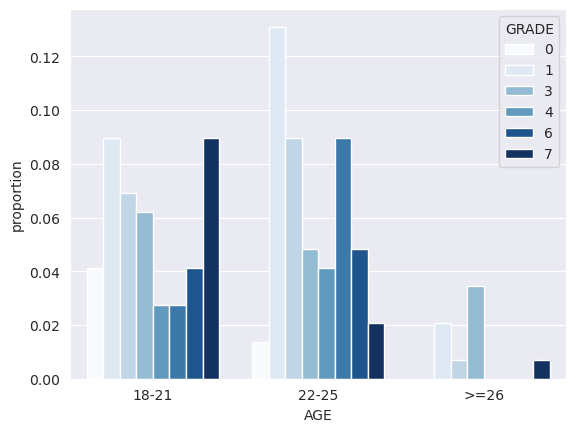

In [135]:
#Proporção em relação ao total de alunos
#Alunos divididos por idade e nota
#Por exemplo, qual a proporção de aluno com idade entre 18 e 21 anos tirou nota 0

barplot_proporcao_total(df_higher_education,index_idade,'AGE')

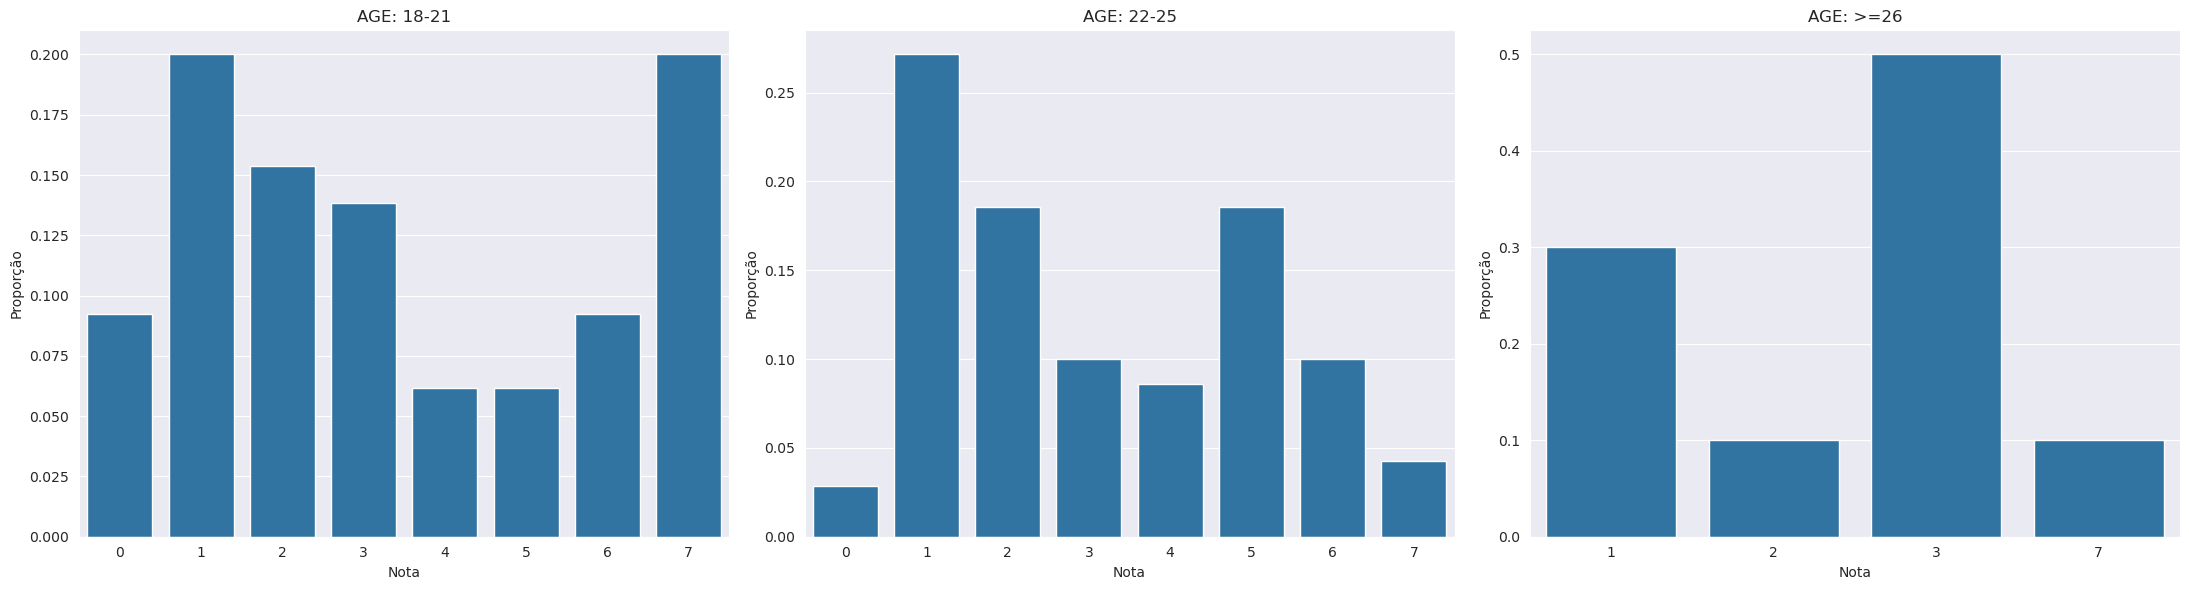

In [136]:
#Proporção em relação ao total dentro de cada grupo
#Por exemplo, dentre os alunos com idade entre 18 e 21 anos, qual a proporção tirou nota 0


gerar_subplot_proporcao_por_grupo(df_higher_education,index_idade,"AGE")

## Gender

In [137]:
# Proporcao de alunos em cada grupo de idade


#Sex (1: female, 2: male)
index_gender={1: 'female', 2: 'male'}
criar_df_value_counts_proporcao(df_higher_education,index_gender,"GENDER",'Gender')


,Proporcao (%)
Gender,
male,0.6
female,0.4


In [138]:
nota_media_por_grupo(df_higher_education,index_gender,"GENDER",'Gender')

GRADE          
       count      mean
Gender                
female    58  2.327586
male      87  3.827586

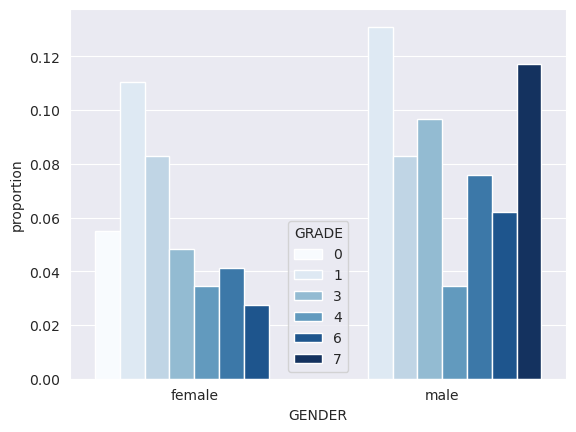

In [139]:
#Proporção em relação ao total de alunos
#Divididos por sexo e nota

barplot_proporcao_total(df_higher_education,index_gender,'GENDER')

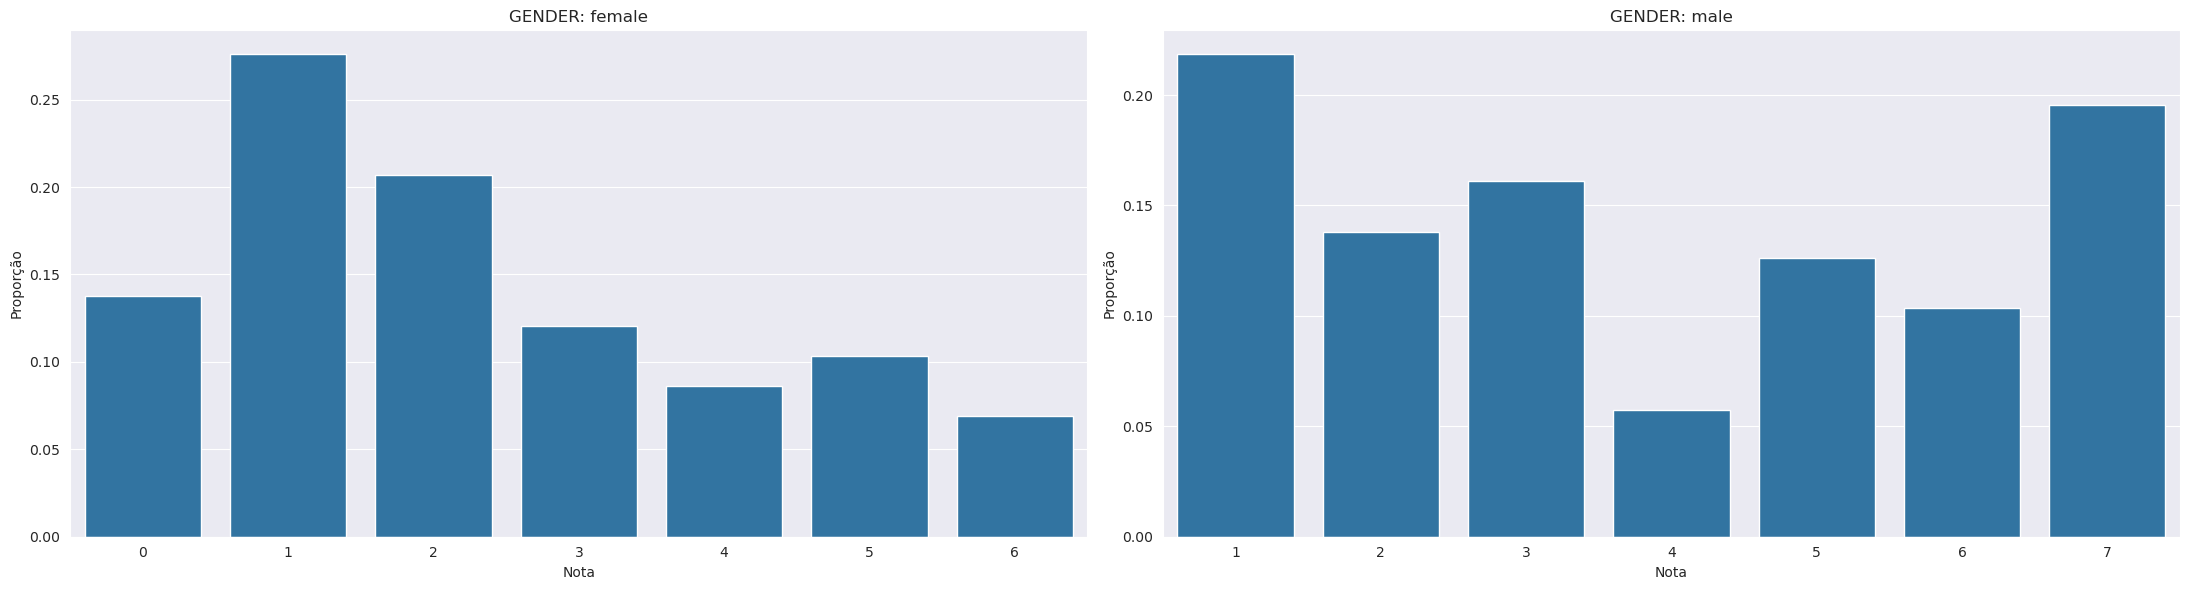

In [140]:
#Proporção dentro de cada grupo

gerar_subplot_proporcao_por_grupo(df_higher_education,index_gender,"GENDER")

## Graduated high-school type

In [141]:
index_high_school = {1: 'private', 2: 'state', 3: 'other'}
criar_df_value_counts_proporcao(df_higher_education,index_high_school,'HS_TYPE','High School Type')

,Proporcao (%)
High School Type,
state,0.710345
private,0.172414
other,0.117241


In [142]:
nota_media_por_grupo(df_higher_education,index_high_school,'HS_TYPE','High School Type')

GRADE          
                 count      mean
High School Type                
private             25  2.600000
state              103  3.359223
other               17  3.352941

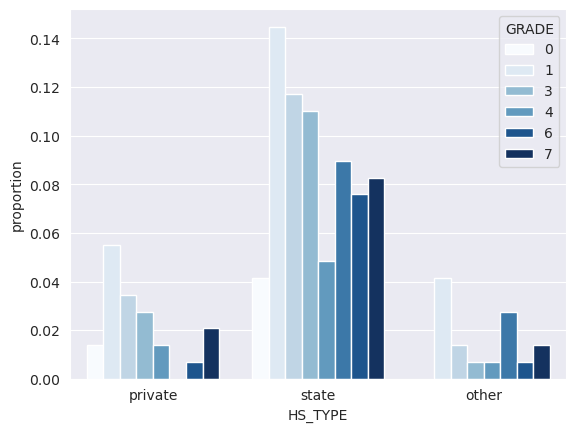

In [143]:
#Proporção em relação ao total de alunos
#Divididos por high school e nota

barplot_proporcao_total(df_higher_education,index_high_school,'HS_TYPE')

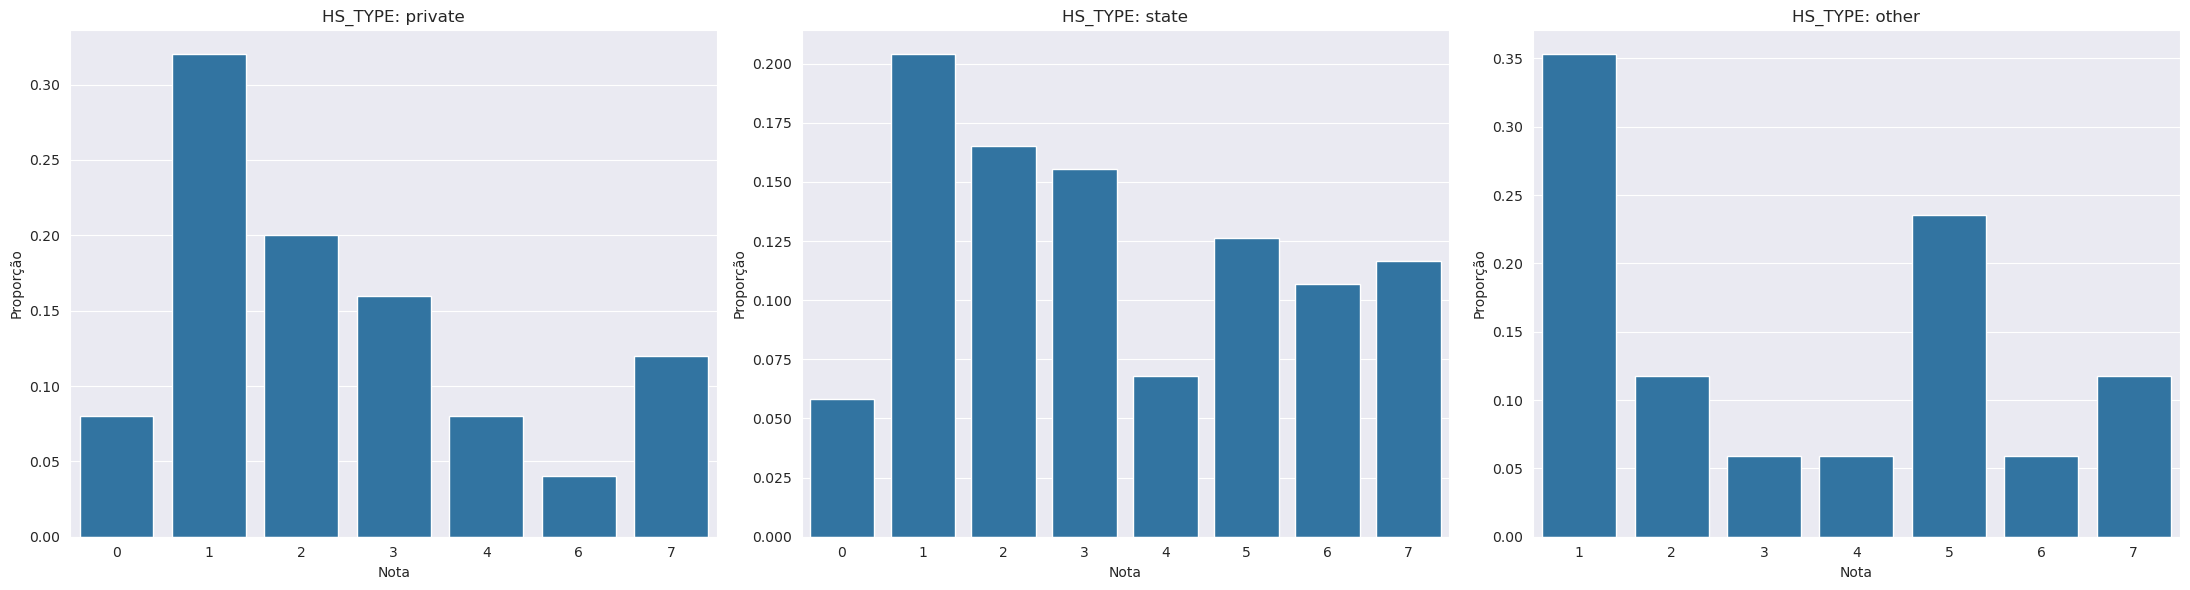

In [144]:
#Proporção dentro de cada grupo

gerar_subplot_proporcao_por_grupo(df_higher_education,index_high_school,"HS_TYPE")

## Scholarship type

In [145]:
index_scholarship_type={1: '0%', 2: '25%', 3: '50%', 4: '75%', 5: 'Full'}
criar_df_value_counts_proporcao(df_higher_education,index_scholarship_type,'SCHOLARSHIP','Scholarship Type') 

,Proporcao (%)
Scholarship Type,
50%,0.524138
75%,0.289655
Full,0.158621
25%,0.020690
0%,0.006897


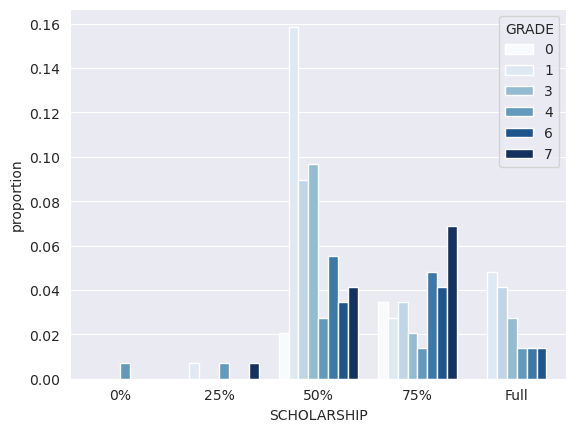

In [146]:
#Proporção em relação ao total de alunos
#Divididos por high school e nota

barplot_proporcao_total(df_higher_education,index_scholarship_type,'SCHOLARSHIP')

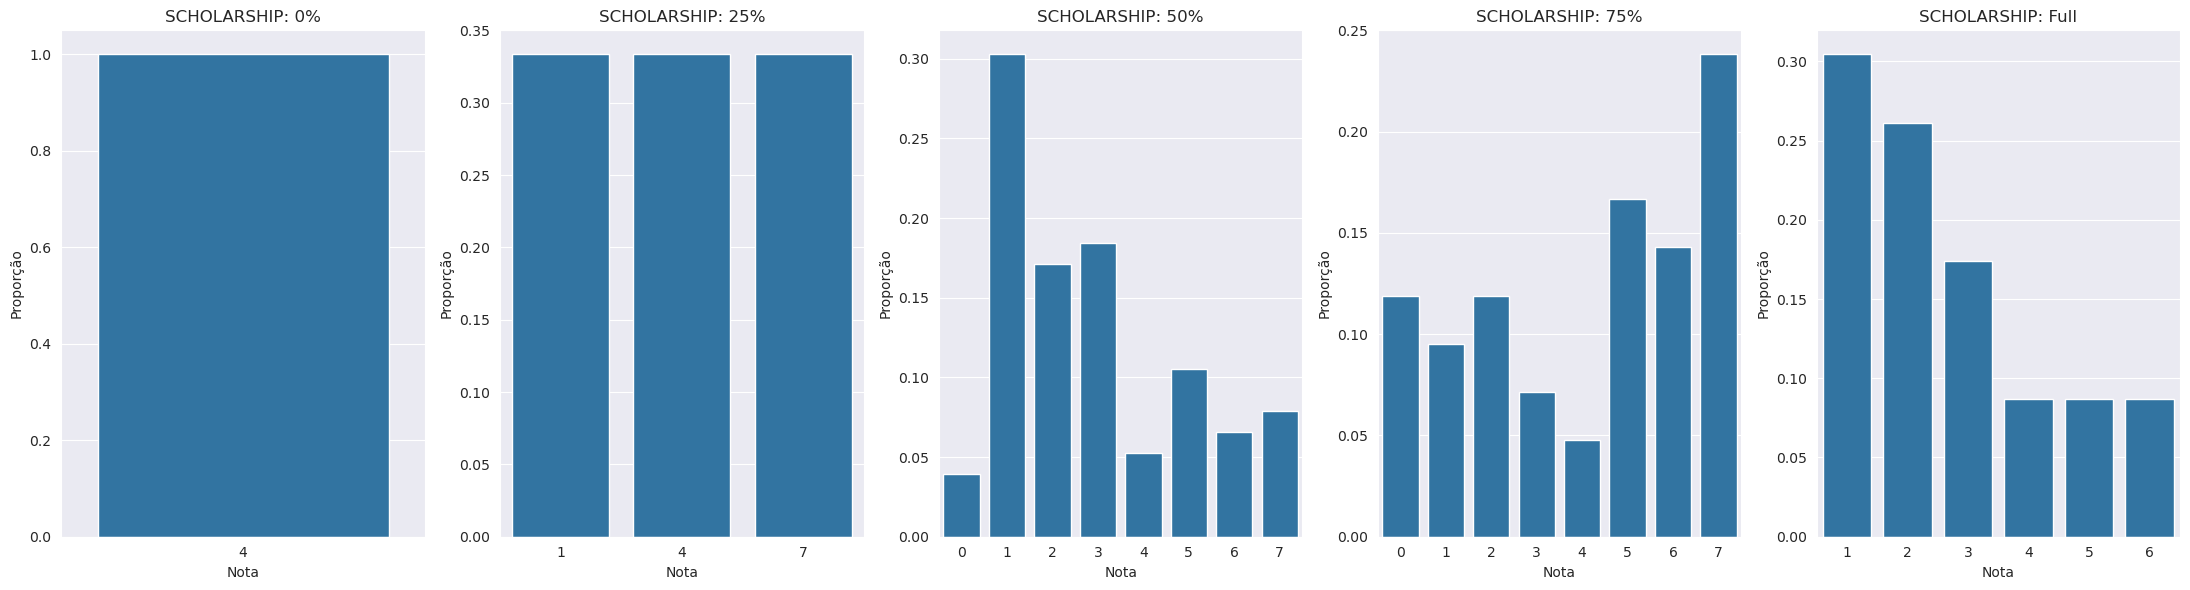

In [147]:
#Proporção dentro de cada grupo

gerar_subplot_proporcao_por_grupo(df_higher_education,index_scholarship_type,"SCHOLARSHIP")

## Additional work

In [148]:
index_aditional_work= {1: 'Yes', 2: 'No'}
criar_df_value_counts_proporcao(df_higher_education,index_aditional_work,'WORK','Additional Work')


,Proporcao (%)
Additional Work,
No,0.662069
Yes,0.337931


In [149]:
nota_media_por_grupo(df_higher_education,index_aditional_work,'WORK','Additional Work')

GRADE          
                count      mean
Additional Work                
Yes                49  2.714286
No                 96  3.489583

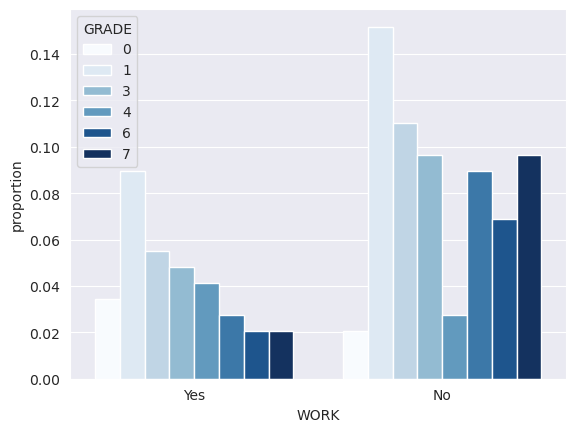

In [150]:
barplot_proporcao_total(df_higher_education,index_aditional_work,"WORK")

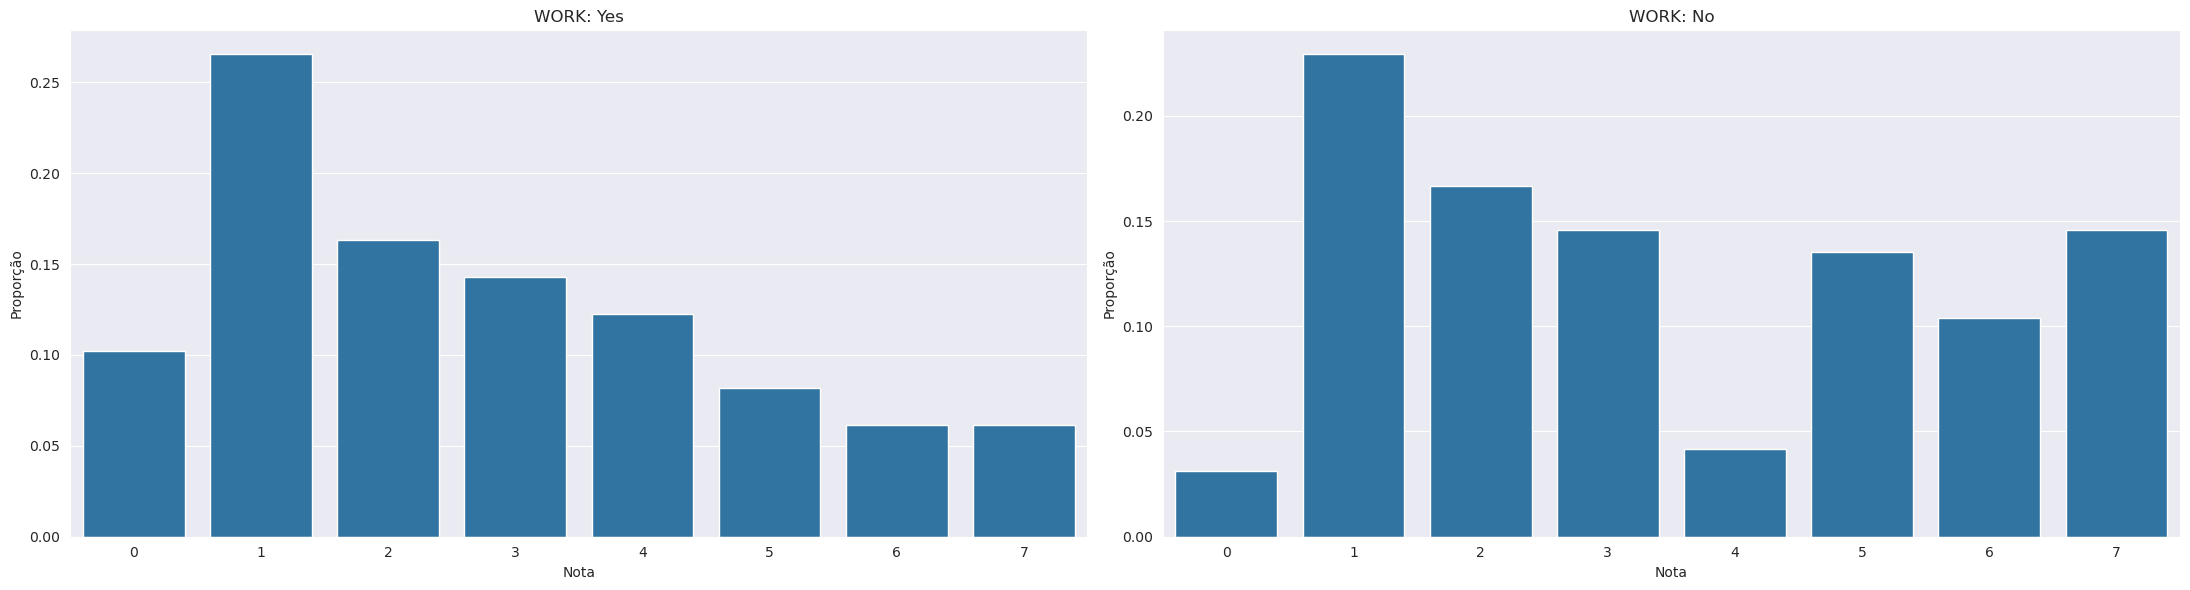

In [151]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_aditional_work,"WORK")

## Regular artistic or sports activity

In [152]:
index_sports_artistic_activity={1: 'Yes', 2: 'No'}
criar_df_value_counts_proporcao(df_higher_education,index_sports_artistic_activity,'ACTIVITY',"Extra Activities")

,Proporcao (%)
Extra Activities,
No,0.6
Yes,0.4


In [153]:
nota_media_por_grupo(df_higher_education,index_sports_artistic_activity,'ACTIVITY',"Extra Activities")

GRADE          
                 count      mean
Extra Activities                
Yes                 58  3.396552
No                  87  3.114943

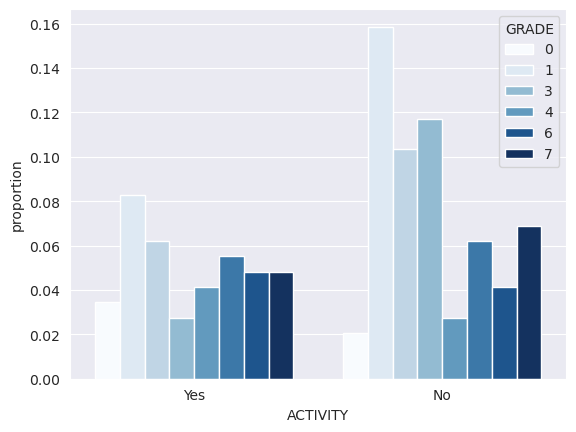

In [154]:
barplot_proporcao_total(df_higher_education,index_sports_artistic_activity,'ACTIVITY')

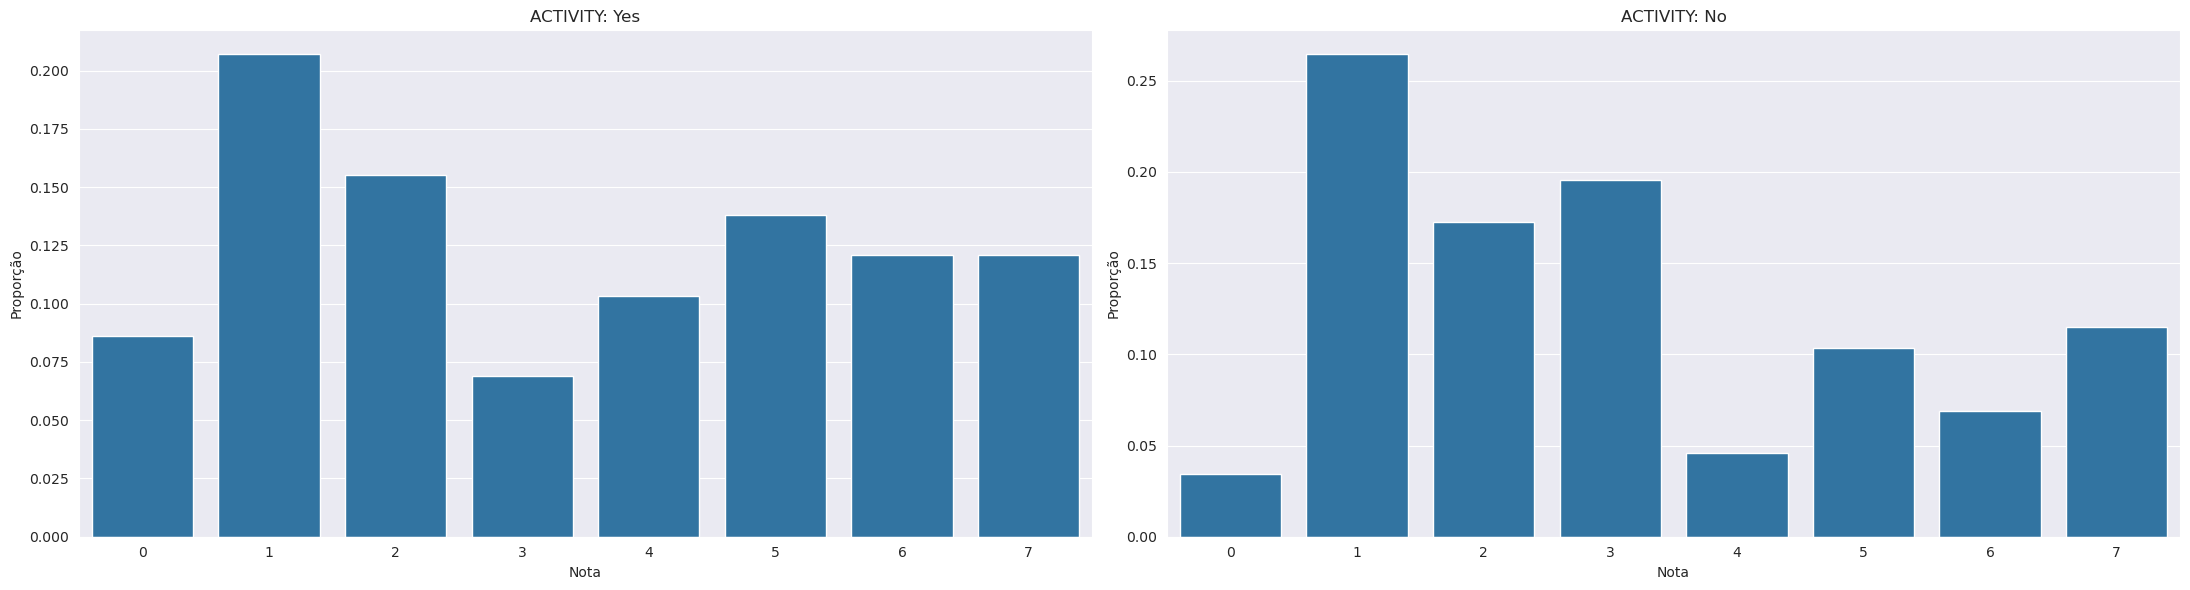

In [155]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_sports_artistic_activity,'ACTIVITY')


## Partner

In [156]:
index_partner={1: 'Yes', 2: 'No'}
criar_df_value_counts_proporcao(df_higher_education,index_partner,'PARTNER','Partner')


,Proporcao (%)
Partner,
No,0.57931
Yes,0.42069


In [157]:
nota_media_por_grupo(df_higher_education,index_partner,'PARTNER','Partner')

GRADE          
        count      mean
Partner                
Yes        61  3.360656
No         84  3.130952

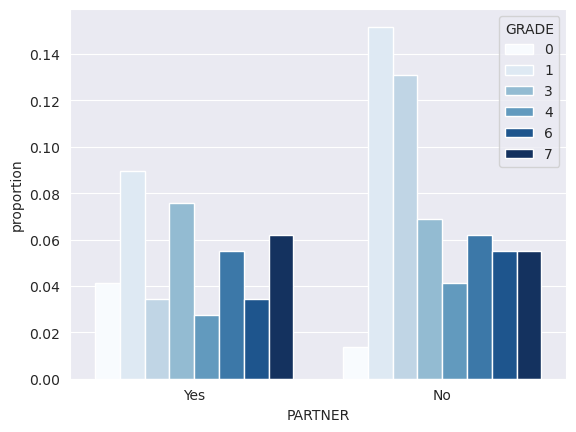

In [158]:
barplot_proporcao_total(df_higher_education,index_partner,'PARTNER',stat='proportion',pallete='Blues')


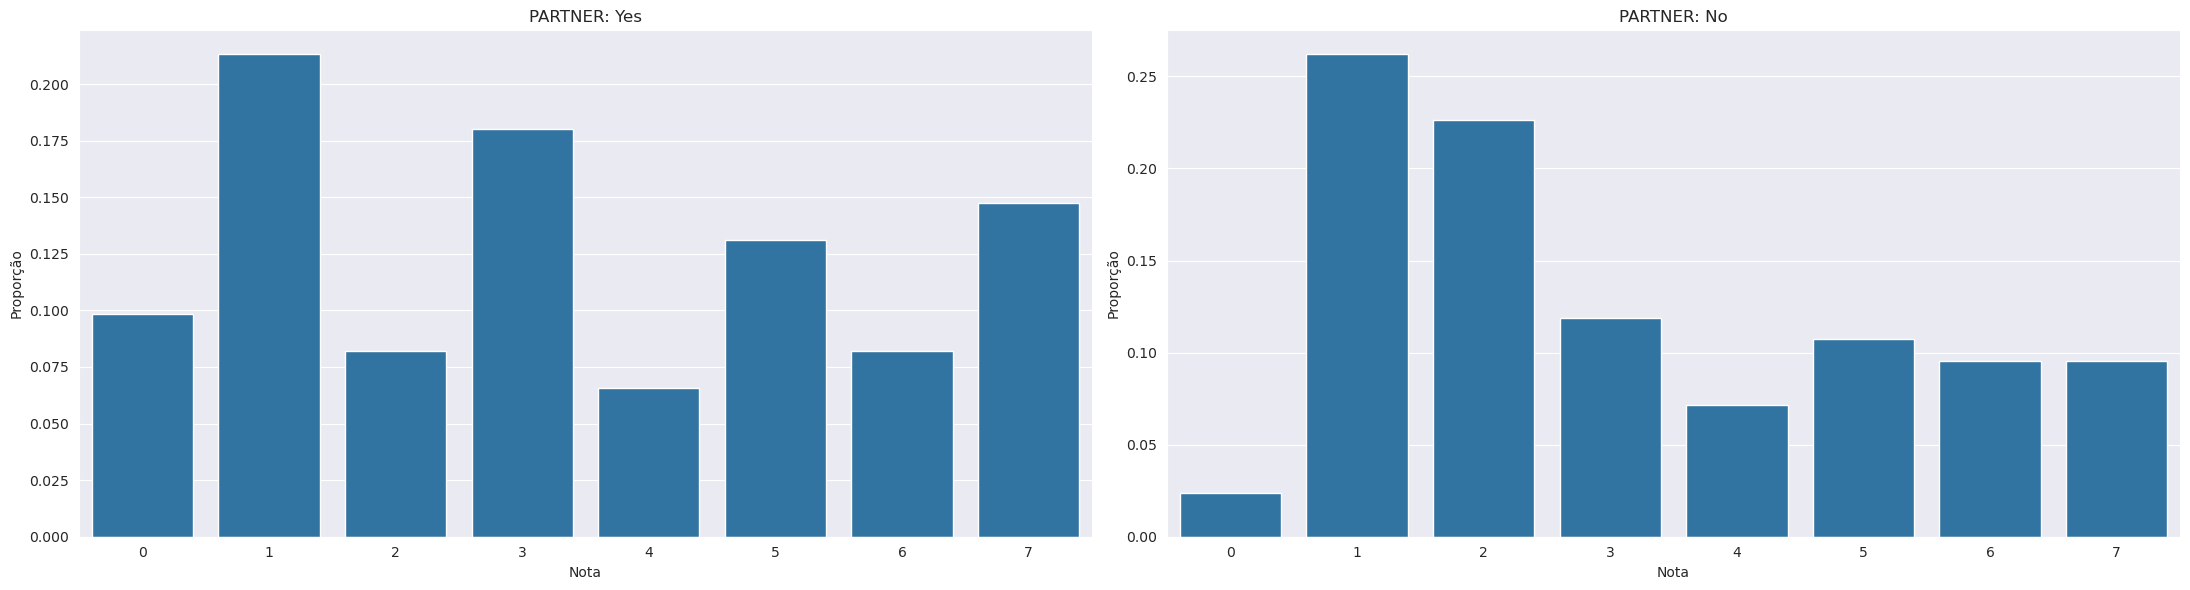

In [159]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_partner,'PARTNER',nrows=1,coluna_contagem='STUDENTID',figsize=(22,6),xlabel='Nota',ylabel='Proporção')


## Total salary if available

In [160]:
index_salary={1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410', 5: 'above 410'}
criar_df_value_counts_proporcao(df_higher_education,index_salary,"SALARY",'Salary')

,Proporcao (%)
Salary,
USD 135-200,0.641379
USD 201-270,0.186207
USD 271-340,0.110345
above 410,0.034483
USD 341-410,0.027586


In [161]:
nota_media_por_grupo(df_higher_education,index_salary,"SALARY",'Salary')

GRADE          
            count      mean
Salary                     
USD 135-200    93  3.505376
USD 201-270    27  2.962963
USD 271-340    16  2.500000
USD 341-410     4  2.000000
above 410       5  2.800000

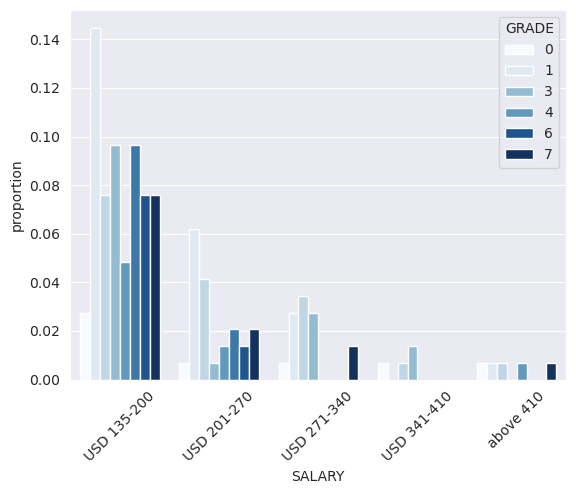

In [162]:
barplot_proporcao_total(df_higher_education,index_salary,'SALARY',rotation=45)

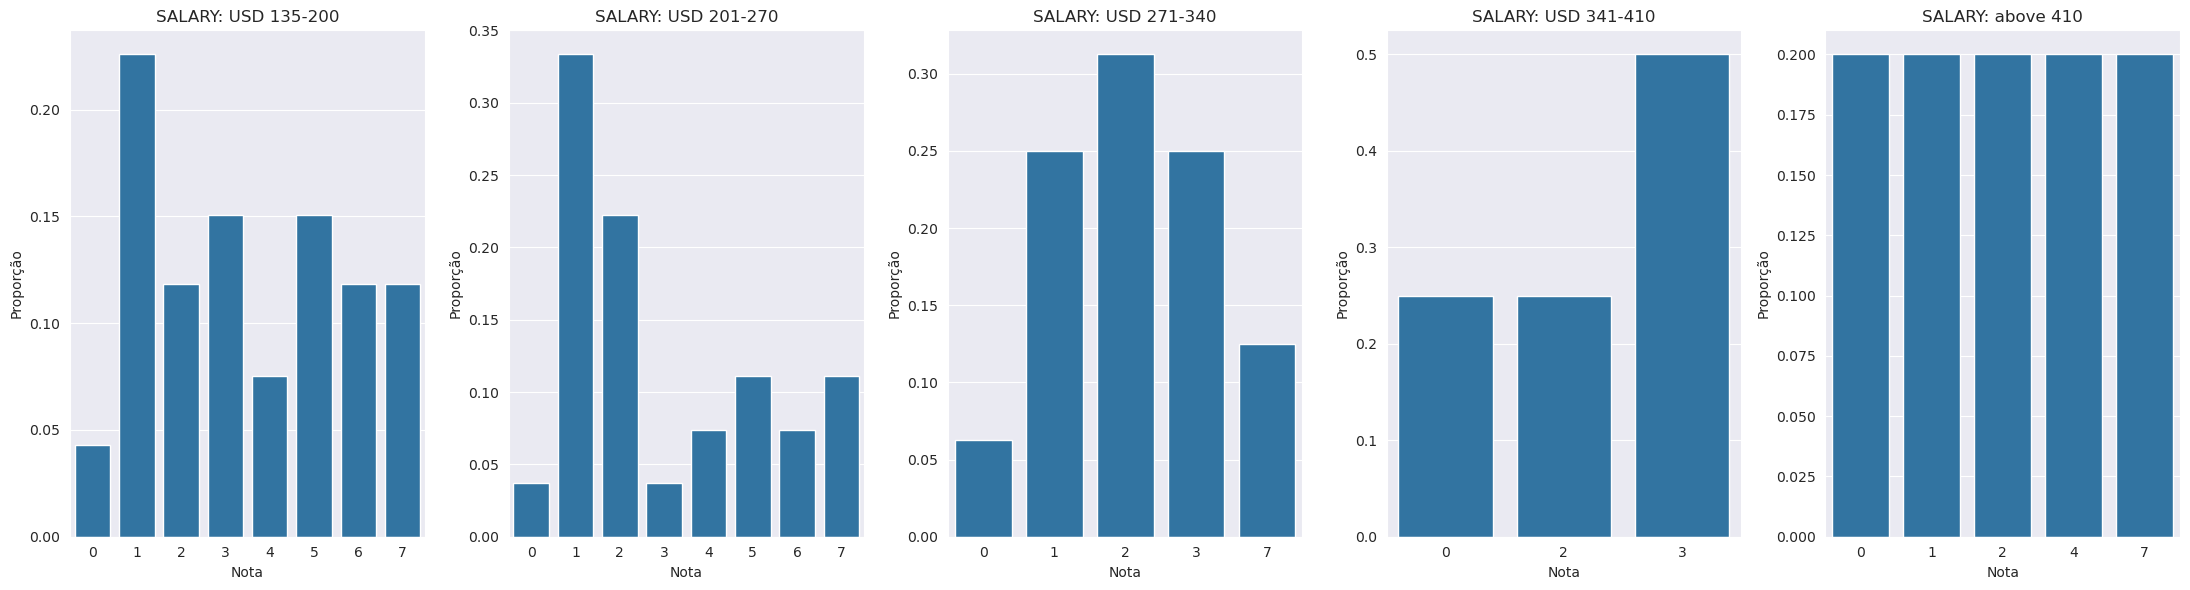

In [163]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_salary,'SALARY')

## Transportation to the university

In [164]:
index_tranportation={1: 'Bus', 2: 'Private car/taxi', 3: 'bicycle', 4:'Other'}
criar_df_value_counts_proporcao(df_higher_education,index_tranportation,"TRANSPORT",'Transport')

,Proporcao (%)
Transport,
Bus,0.675862
Private car/taxi,0.172414
Other,0.144828
bicycle,0.006897


In [165]:
nota_media_por_grupo(df_higher_education,index_tranportation,"TRANSPORT",'Transport')

GRADE         
                 count     mean
Transport                      
Bus                 98  3.44898
Private car/taxi    25  3.00000
bicycle              1  2.00000
Other               21  2.52381

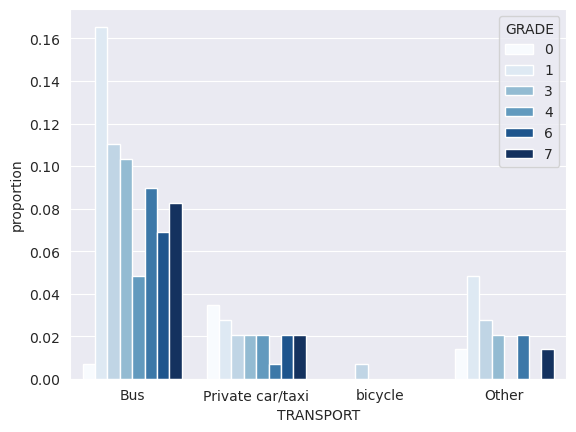

In [166]:
barplot_proporcao_total(df_higher_education,index_tranportation,"TRANSPORT")

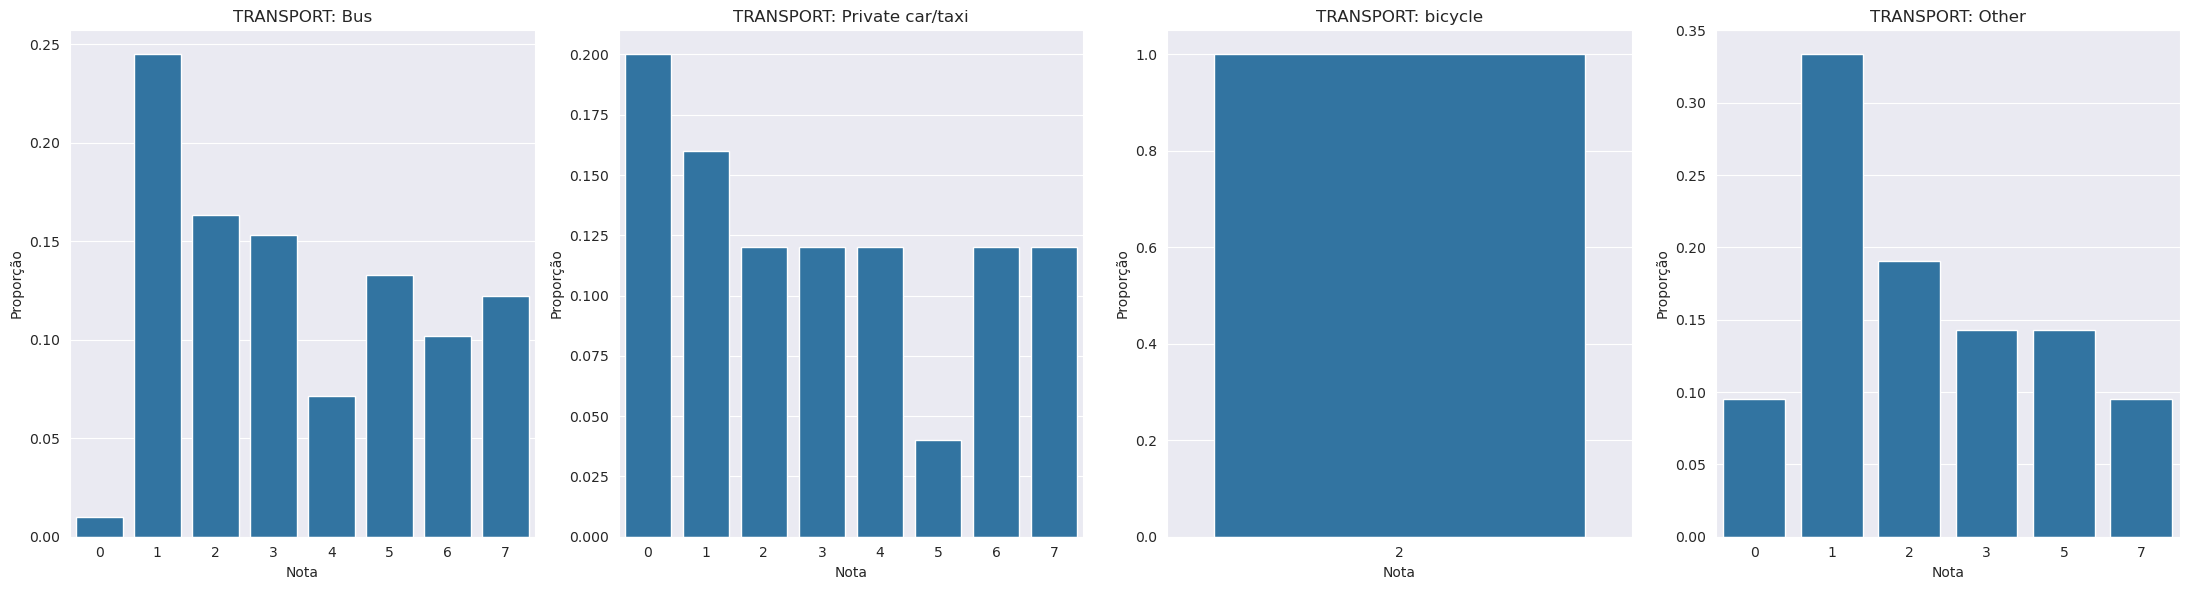

In [167]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_tranportation,"TRANSPORT")

##  Accommodation type

In [168]:
accommodation_index={1: 'rental', 2: 'dormitory', 3: 'with family', 4: 'Other'}
criar_df_value_counts_proporcao(df_higher_education,accommodation_index,"LIVING",'ACCOMODATION')

,Proporcao (%)
ACCOMODATION,
rental,0.468966
dormitory,0.337931
with family,0.186207
Other,0.006897


In [169]:
nota_media_por_grupo(df_higher_education,accommodation_index,"LIVING",'Accomodation')

GRADE          
             count      mean
Accomodation                
rental          68  3.088235
dormitory       49  3.448980
with family     27  3.259259
Other            1  1.000000

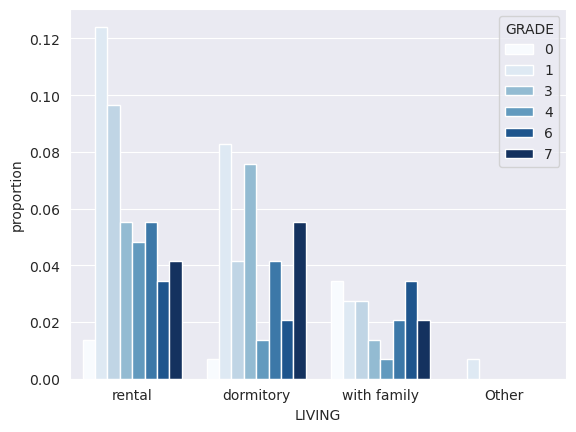

In [170]:
barplot_proporcao_total(df_higher_education,accommodation_index,"LIVING")

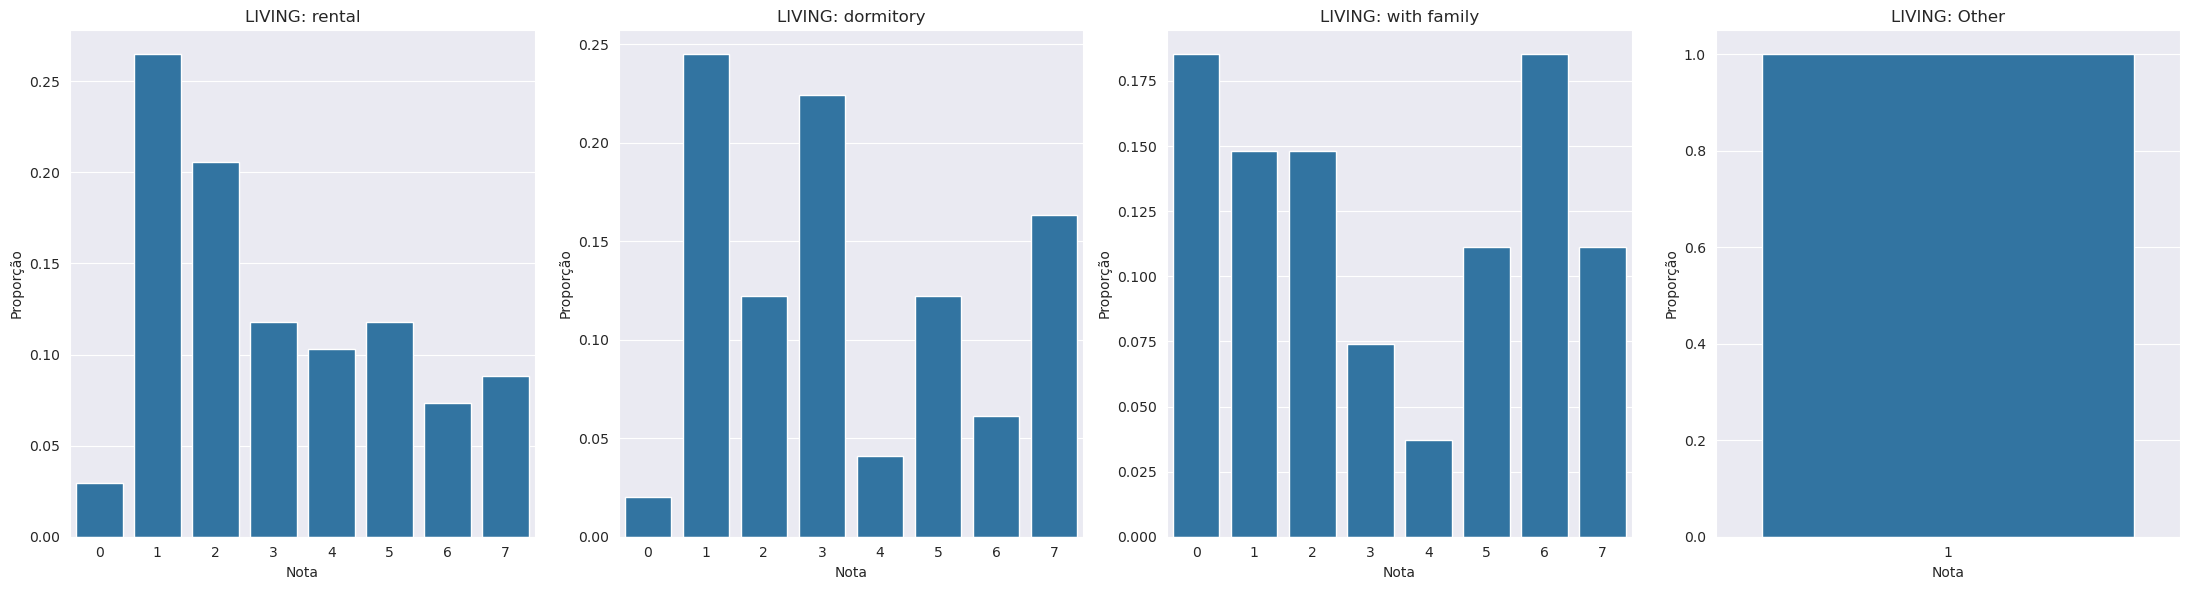

In [171]:
gerar_subplot_proporcao_por_grupo(df_higher_education,accommodation_index,"LIVING")

## Mother's education

In [172]:
index_mother_education={1: 'primary school', 2: 'secondary school', 3: 'high school', 4: 'university', 5: 'MSc.', 6: 'Ph.D.'}

In [173]:
criar_df_value_counts_proporcao(df_higher_education,index_mother_education,'MOTHER_EDU','Mothers Education')

,Proporcao (%)
Mothers Education,
primary school,0.372414
high school,0.268966
secondary school,0.186207
university,0.144828
MSc.,0.013793
Ph.D.,0.013793


In [174]:
nota_media_por_grupo(df_higher_education,index_mother_education,'MOTHER_EDU','Mothers Education')

GRADE          
                  count      mean
Mothers Education                
primary school       54  3.092593
secondary school     27  3.444444
high school          39  2.897436
university           21  3.904762
MSc.                  2  2.000000
Ph.D.                 2  4.500000

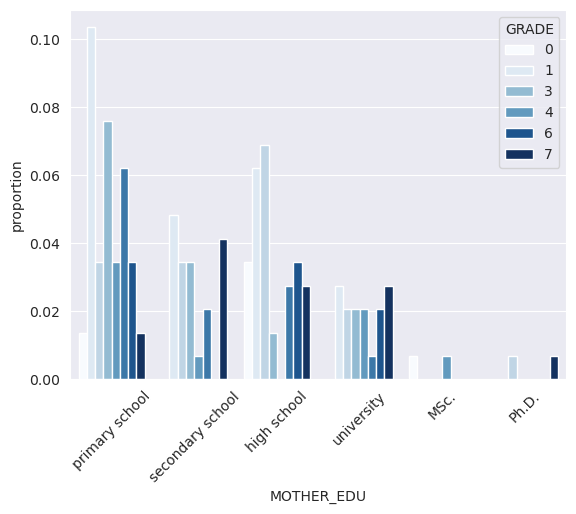

In [175]:
barplot_proporcao_total(df_higher_education,index_mother_education,'MOTHER_EDU',rotation=45)


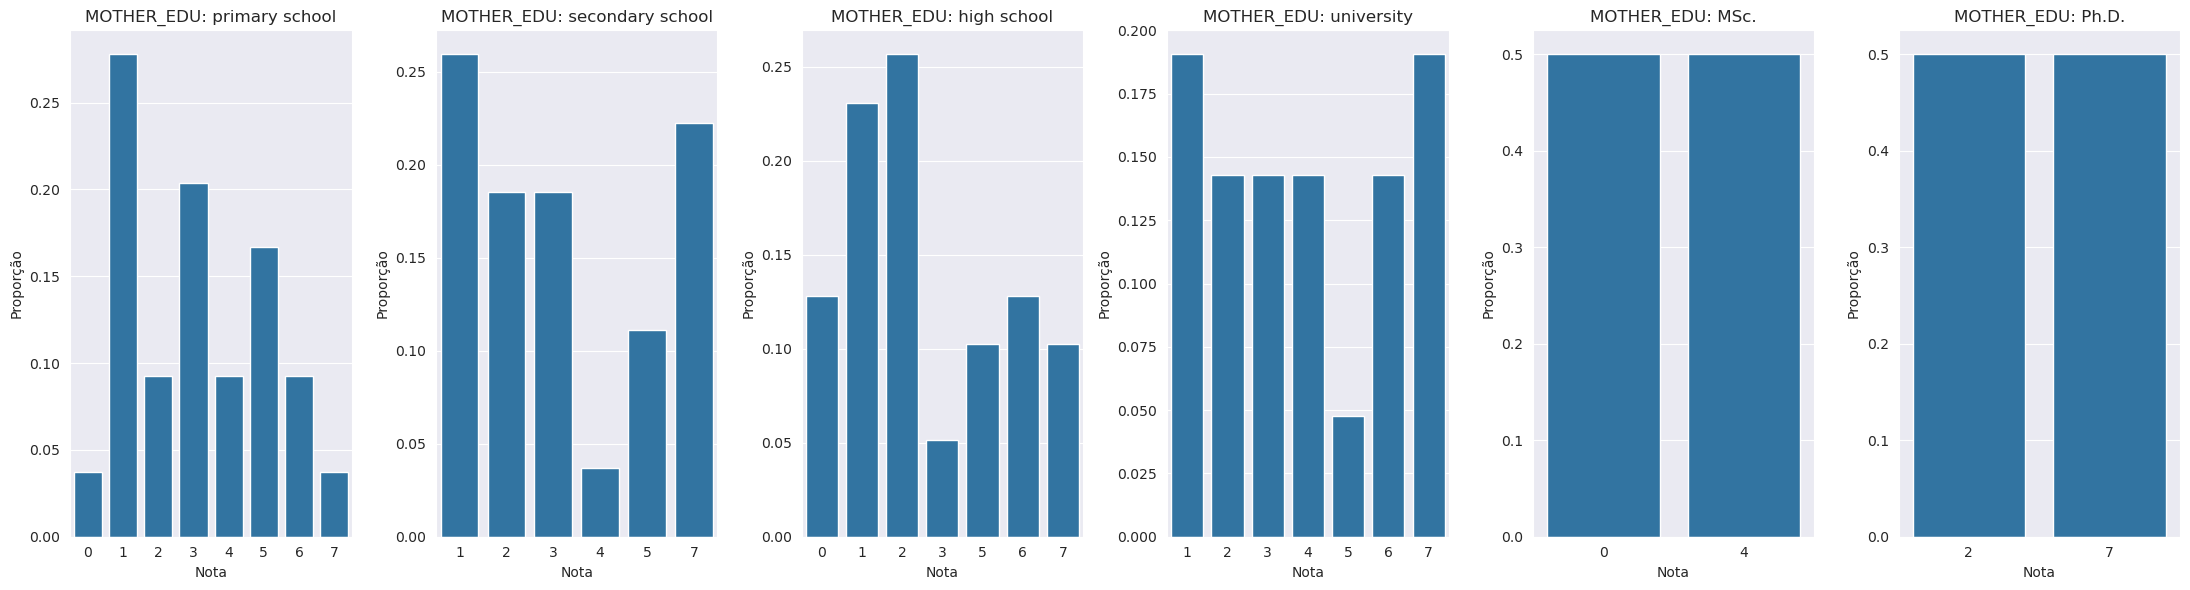

In [176]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_mother_education,'MOTHER_EDU')

## Father's Education

In [177]:
index_father_education={1: 'primary school', 2: 'secondary school', 3: 'high school', 4: 'university', 5: 'MSc.', 6: 'Ph.D.'}
criar_df_value_counts_proporcao(df_higher_education,index_father_education,"FATHER_EDU",'Fathers Education')

,Proporcao (%)
Fathers Education,
high school,0.317241
secondary school,0.248276
primary school,0.200000
university,0.193103
MSc.,0.034483
Ph.D.,0.006897


In [178]:
nota_media_por_grupo(df_higher_education,index_father_education,"FATHER_EDU",'Fathers Education')

GRADE          
                  count      mean
Fathers Education                
primary school       29  3.068966
secondary school     36  3.166667
high school          46  3.195652
university           28  3.392857
MSc.                  5  4.000000
Ph.D.                 1  3.000000

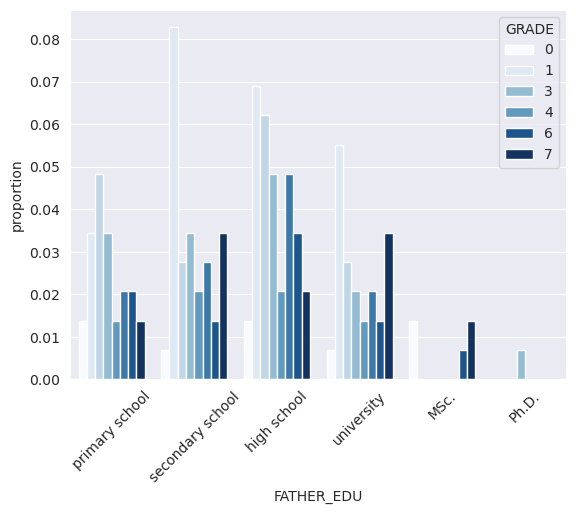

In [179]:
barplot_proporcao_total(df_higher_education,index_father_education,"FATHER_EDU",rotation=45)

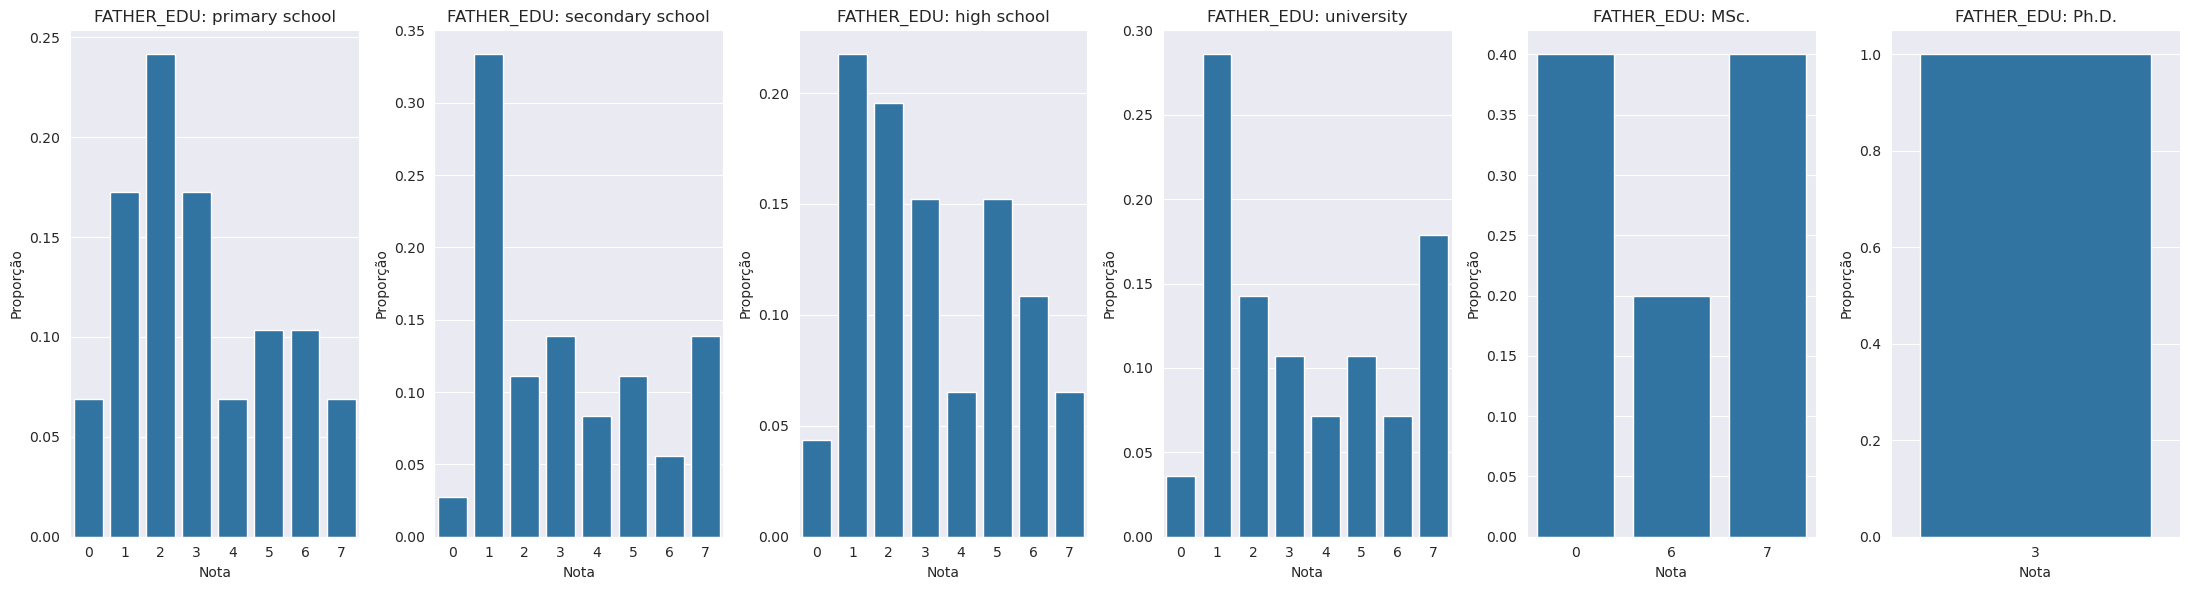

In [180]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_father_education,"FATHER_EDU")

## Number of sisters/brothers 

In [181]:
index_siblings= {1:'1',2:'2',3: '3',4:'4',5: '5 or above'}
criar_df_value_counts_proporcao(df_higher_education,index_siblings,"#_SIBLINGS",'Siblings')


,Proporcao (%)
Siblings,
2,0.310345
1,0.186207
3,0.179310
5 or above,0.165517
4,0.158621


In [182]:
nota_media_por_grupo(df_higher_education,index_siblings,"#_SIBLINGS",'Siblings')

GRADE          
           count      mean
Siblings                  
1             27  3.259259
2             45  2.977778
3             26  3.076923
4             23  3.304348
5 or above    24  3.750000

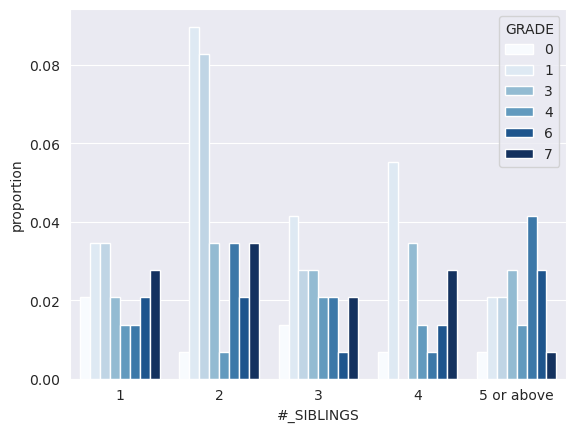

In [183]:
barplot_proporcao_total(df_higher_education,index_siblings,"#_SIBLINGS")

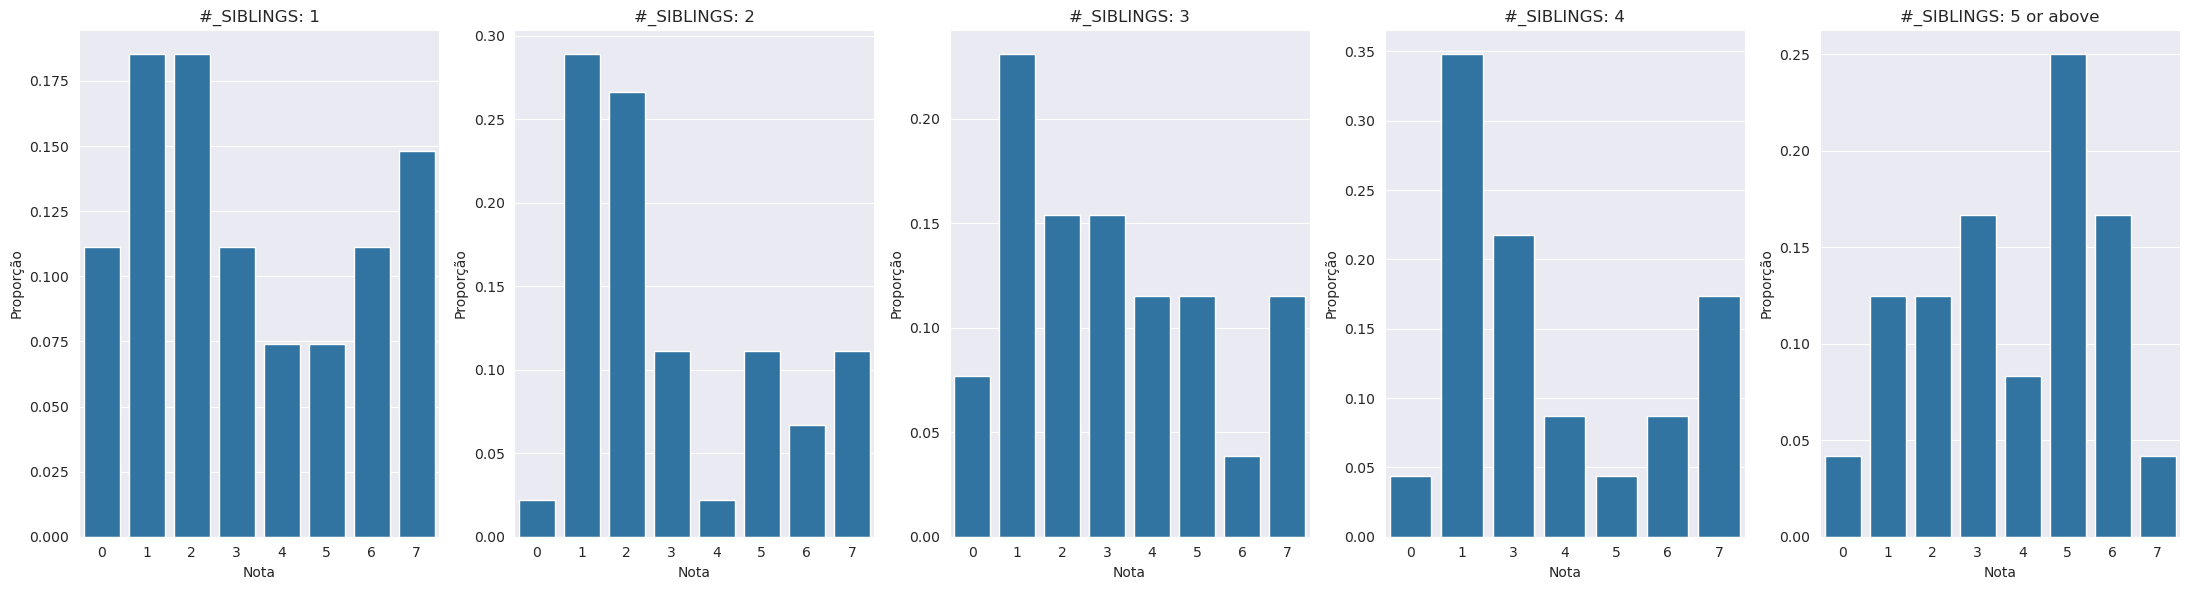

In [184]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_siblings,"#_SIBLINGS")

## Parental status

In [186]:
index_parental_status={1: 'married', 2: 'divorced', 3: 'died - one of them or both'}
criar_df_value_counts_proporcao(df_higher_education,index_parental_status,"PARENTAL STATUS",'Parental Status')

,Proporcao (%)
Parental Status,
married,0.875862
divorced,0.075862
died - one of them or both,0.048276


In [187]:
nota_media_por_grupo(df_higher_education,index_parental_status,"PARENTAL STATUS",'Parental Status')

GRADE          
                           count      mean
Parental Status                           
married                      127  3.204724
divorced                      11  2.818182
died - one of them or both     7  4.285714

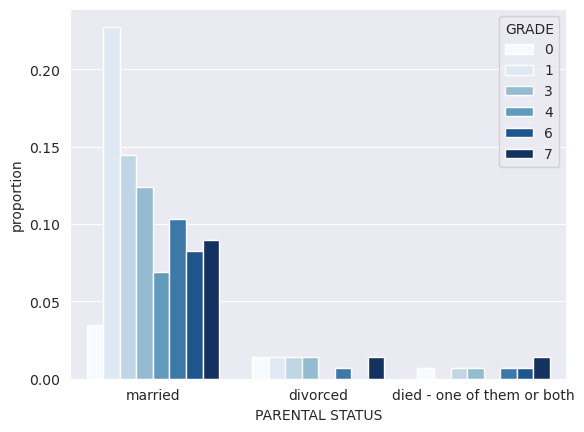

In [188]:
barplot_proporcao_total(df_higher_education,index_parental_status,"PARENTAL STATUS")

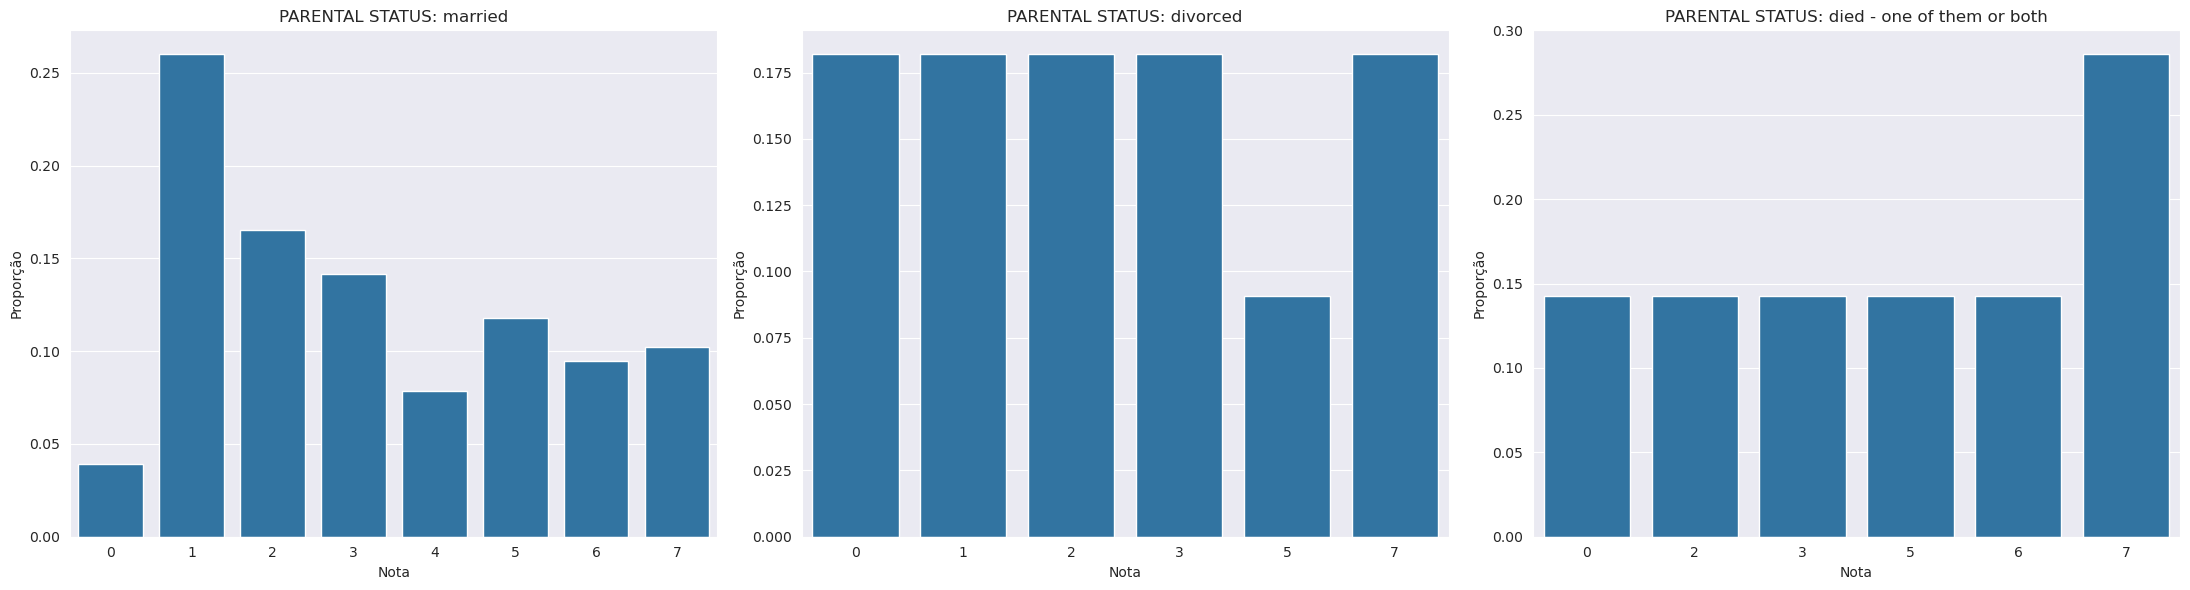

In [189]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_parental_status,"PARENTAL STATUS")

## Mother's occupation

In [190]:
index_mother_ouccupation={1: 'retired', 2: 'housewife', 3: 'government officer', 4: 'private sector employee', 5: 'self-employment', 6: 'other'}
criar_df_value_counts_proporcao(df_higher_education,index_mother_ouccupation,"MOTHER_JOB",'Mothers occupation')

,Proporcao (%)
Mothers occupation,
housewife,0.710345
private sector employee,0.124138
government officer,0.110345
retired,0.041379
self-employment,0.013793


In [191]:
nota_media_por_grupo(df_higher_education,index_mother_ouccupation,"MOTHER_JOB",'Mothers occupation')

GRADE          
                        count      mean
Mothers occupation                     
retired                     6  3.833333
housewife                 103  3.233010
government officer         16  2.750000
private sector employee    18  3.611111
self-employment             2  1.500000

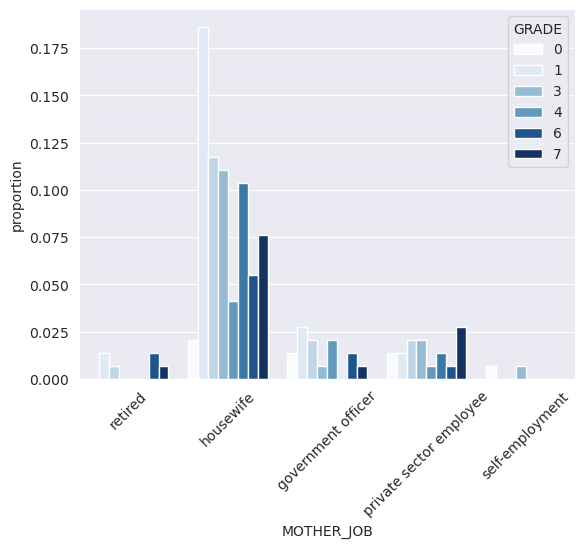

In [193]:
barplot_proporcao_total(df_higher_education,index_mother_ouccupation,"MOTHER_JOB",rotation=45)

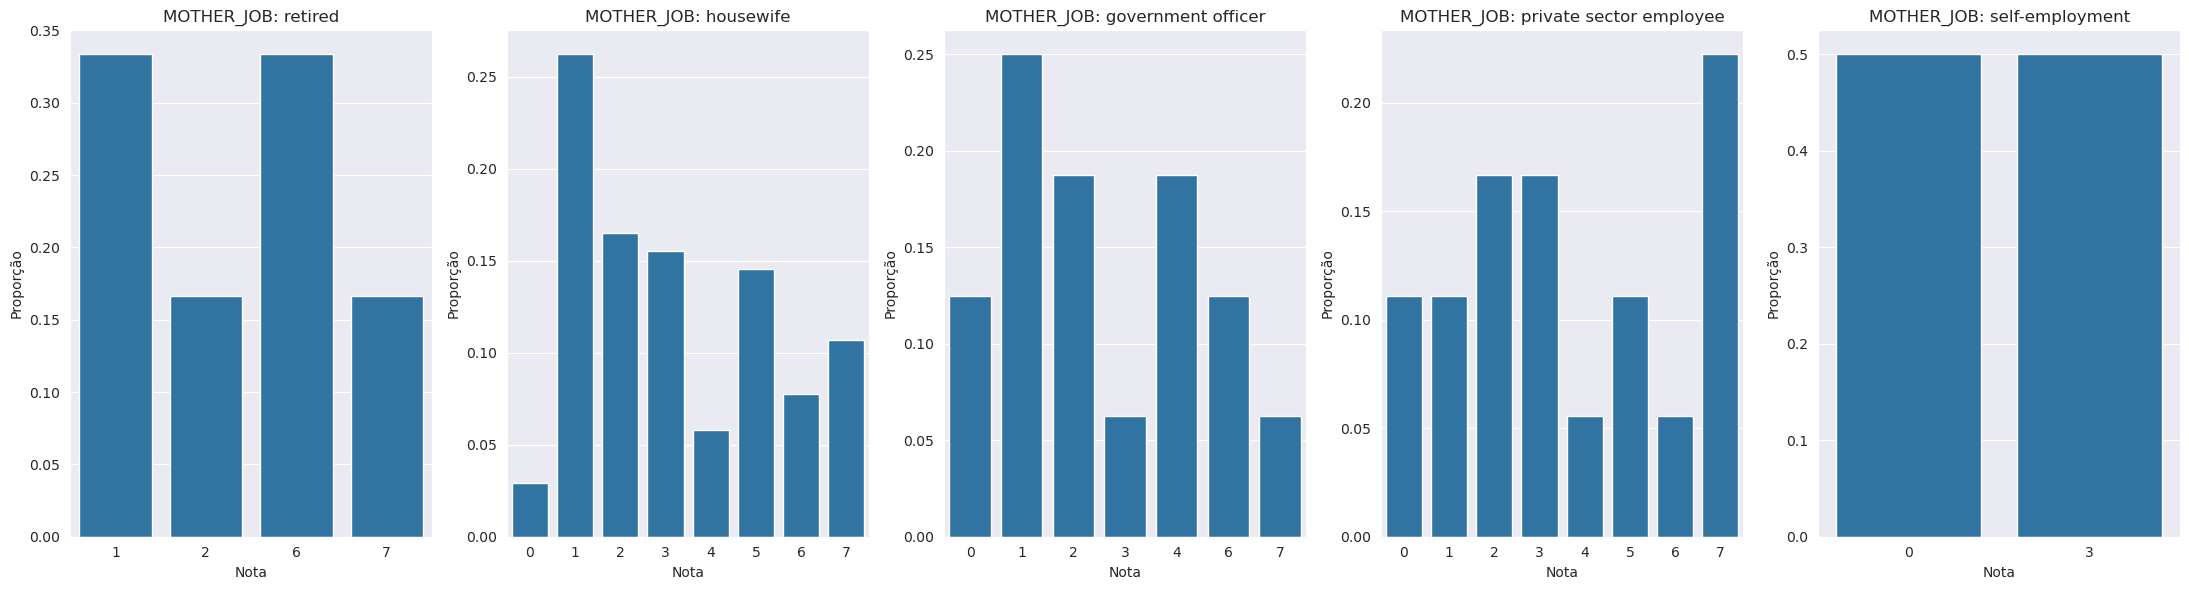

In [194]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_mother_ouccupation,"MOTHER_JOB")

## Father's occupation

In [195]:
index_father_ouccupation={1: 'retired', 2: 'government officer', 3: 'private sector employee', 4: 'self-employment', 5: 'other'}
criar_df_value_counts_proporcao(df_higher_education,index_father_ouccupation,"FATHER_JOB",'Fathers occupation')

,Proporcao (%)
Fathers occupation,
self-employment,0.262069
retired,0.248276
private sector employee,0.241379
government officer,0.151724
other,0.096552


In [196]:
nota_media_por_grupo(df_higher_education,index_father_ouccupation,"FATHER_JOB",'Fathers occupation')

GRADE          
                        count      mean
Fathers occupation                     
retired                    36  3.388889
government officer         22  3.590909
private sector employee    35  2.942857
self-employment            38  3.000000
other                      14  3.571429

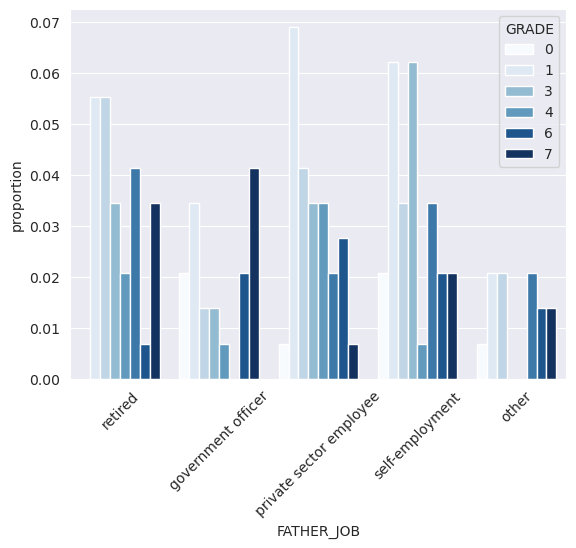

In [199]:
barplot_proporcao_total(df_higher_education,index_father_ouccupation,"FATHER_JOB",rotation=45)

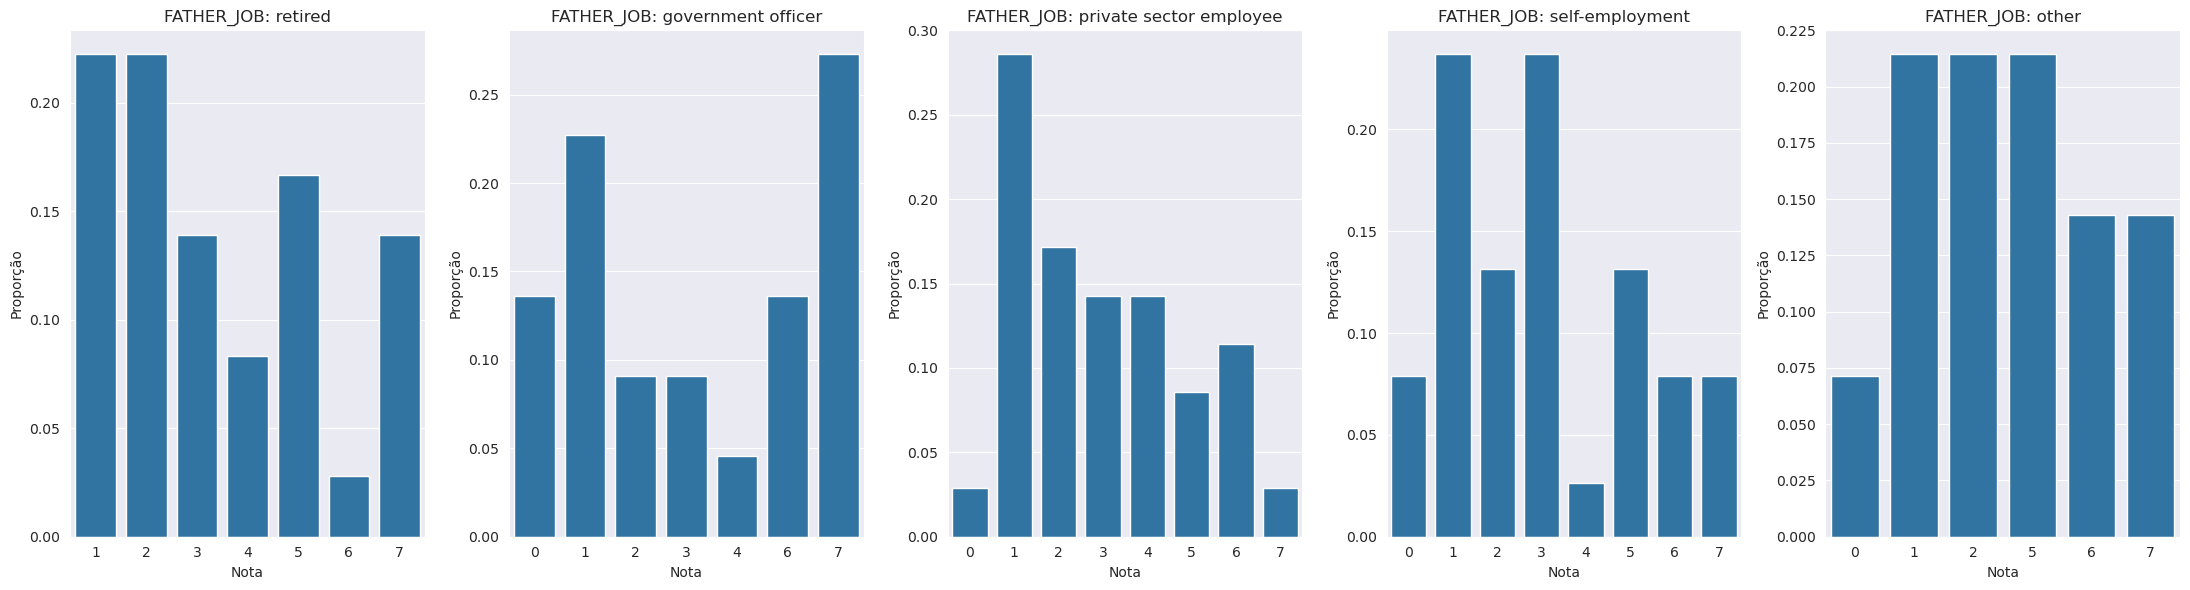

In [198]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_father_ouccupation,"FATHER_JOB")

## Weekly study hours

In [216]:
index_weekly_study_hours={1: '0 hours', 2: '<5 hours', 3: '6-10 hours', 4: '11-20 hours', 5: 'more than 20 hours'}

criar_df_value_counts_proporcao(df_higher_education,index_weekly_study_hours,"STUDY_HRS",'Weekly Study Hours')



,Proporcao (%)
Weekly Study Hours,
<5 hours,0.510345
6-10 hours,0.206897
0 hours,0.200000
11-20 hours,0.055172
more than 20 hours,0.027586


In [217]:
nota_media_por_grupo(df_higher_education,index_weekly_study_hours,"STUDY_HRS",'Weekly Study Hours')


GRADE          
                   count      mean
Weekly Study Hours                
0 hours               29  2.896552
<5 hours              74  3.445946
6-10 hours            30  3.266667
11-20 hours            8  2.875000
more than 20 hours     4  2.000000

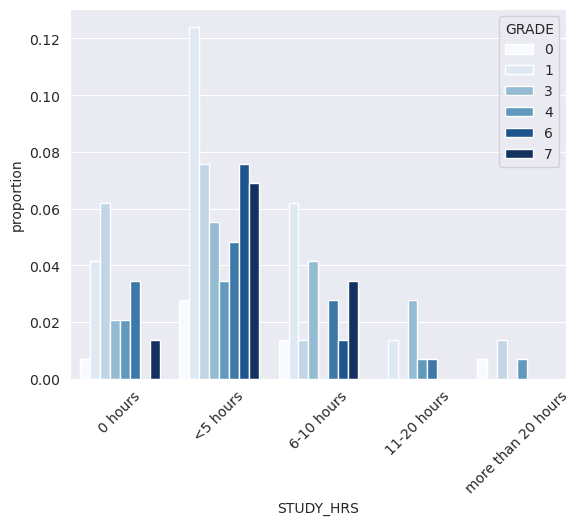

In [218]:
barplot_proporcao_total(df_higher_education,index_weekly_study_hours,"STUDY_HRS",rotation=45)


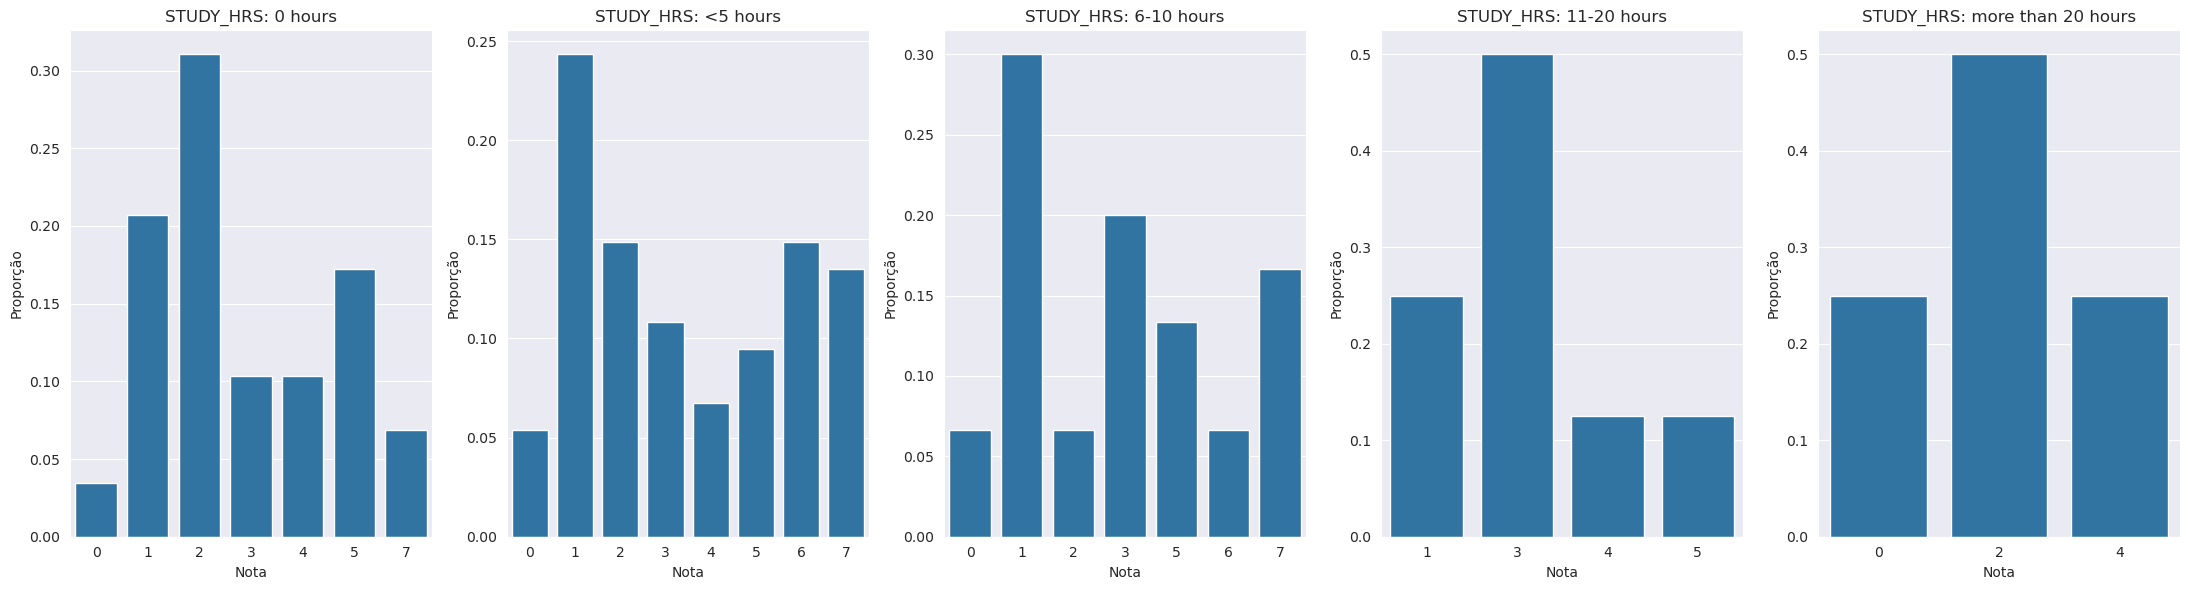

In [219]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_weekly_study_hours,"STUDY_HRS")

## Reading frequency (non-scientific books/journals)

In [220]:
index_reading_non_scientific={1: "Never", 2: 'Sometimes', 3: 'Often'}
criar_df_value_counts_proporcao(df_higher_education,index_reading_non_scientific,"READ_FREQ",'Reading Frequency non Scientific')


,Proporcao (%)
Reading Frequency non Scientific,
Sometimes,0.682759
Never,0.186207
Often,0.131034


In [221]:
nota_media_por_grupo(df_higher_education,index_reading_non_scientific,"READ_FREQ",'Reading Frequency non Scientific')


GRADE          
                                 count      mean
Reading Frequency non Scientific                
Never                               27  2.407407
Sometimes                           99  3.323232
Often                               19  3.894737

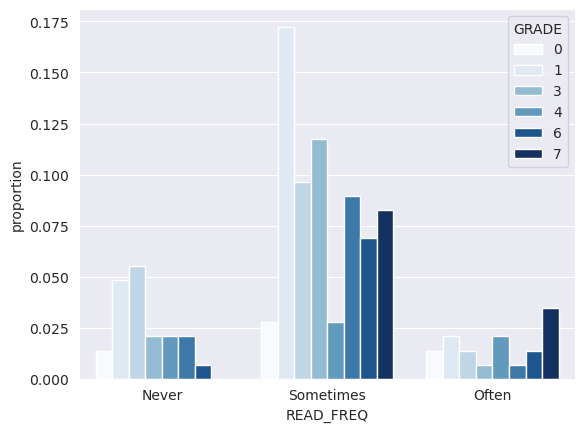

In [222]:
barplot_proporcao_total(df_higher_education,index_reading_non_scientific,"READ_FREQ")


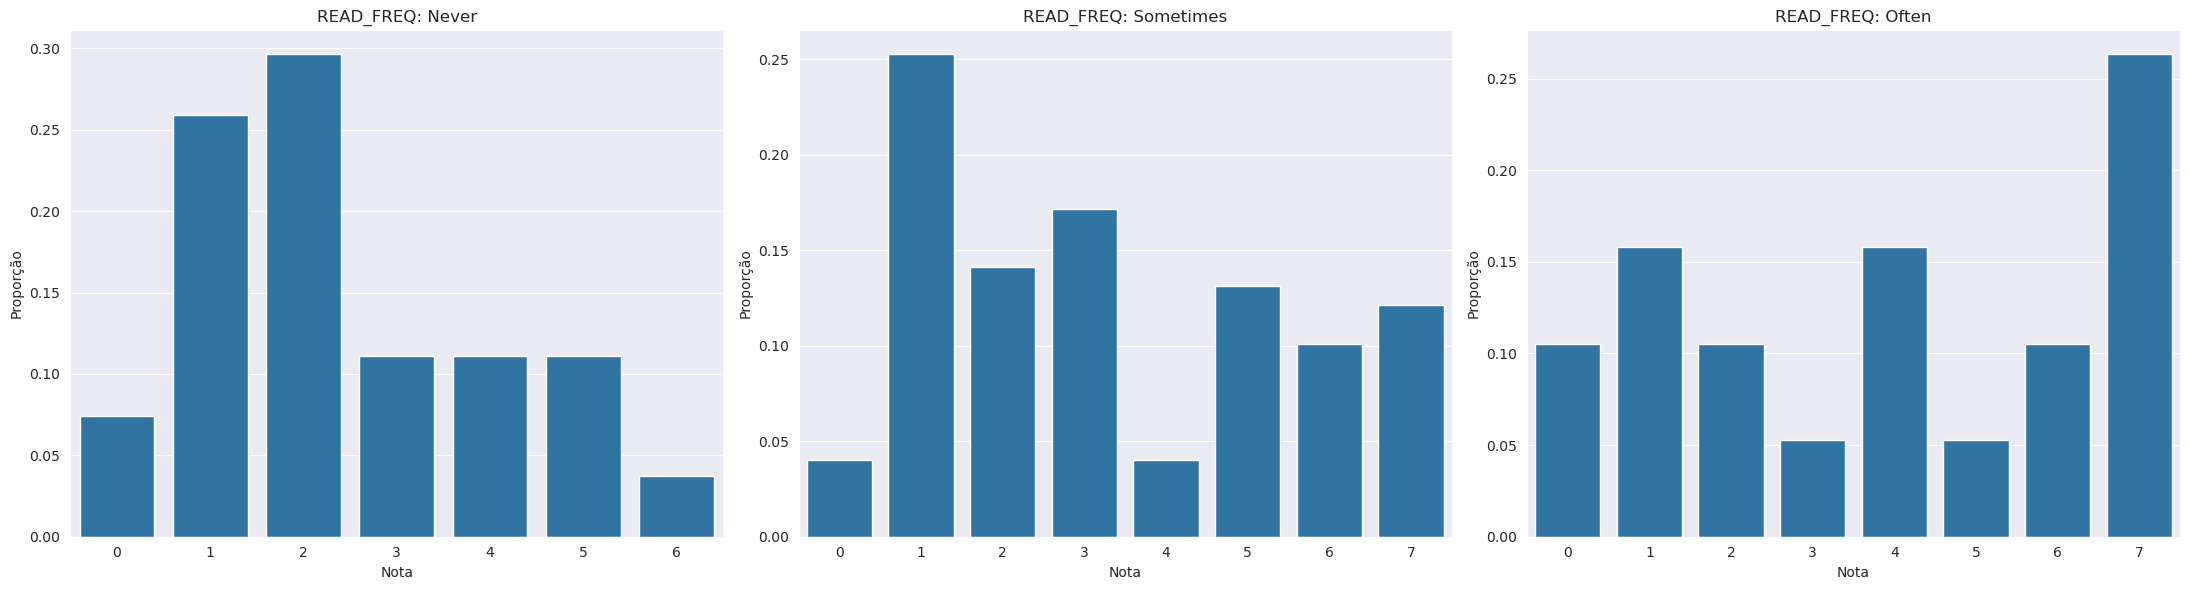

In [223]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_reading_non_scientific,"READ_FREQ")

## Reading frequency (scientific books/journals)

In [224]:
index_reading_scientific={1: "Never", 2: 'Sometimes', 3: 'Often'}
criar_df_value_counts_proporcao(df_higher_education,index_reading_scientific,"READ_FREQ_SCI",'Reading Frequency Scientific')


,Proporcao (%)
Reading Frequency Scientific,
Sometimes,0.710345
Often,0.151724
Never,0.137931


In [225]:
nota_media_por_grupo(df_higher_education,index_reading_scientific,"READ_FREQ_SCI",'Reading Frequency Scientific')

GRADE          
                             count      mean
Reading Frequency Scientific                
Never                           20  2.700000
Sometimes                      103  3.427184
Often                           22  2.772727

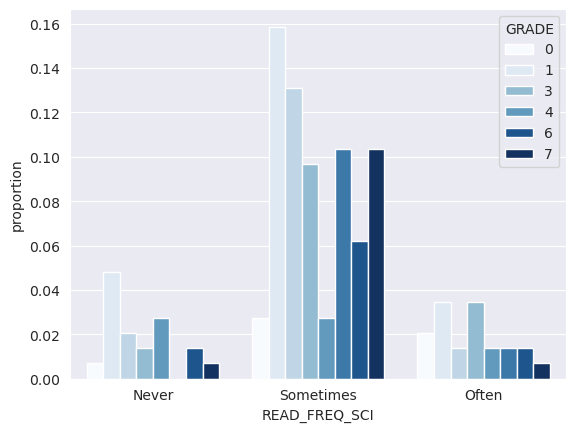

In [226]:
barplot_proporcao_total(df_higher_education,index_reading_scientific,"READ_FREQ_SCI")

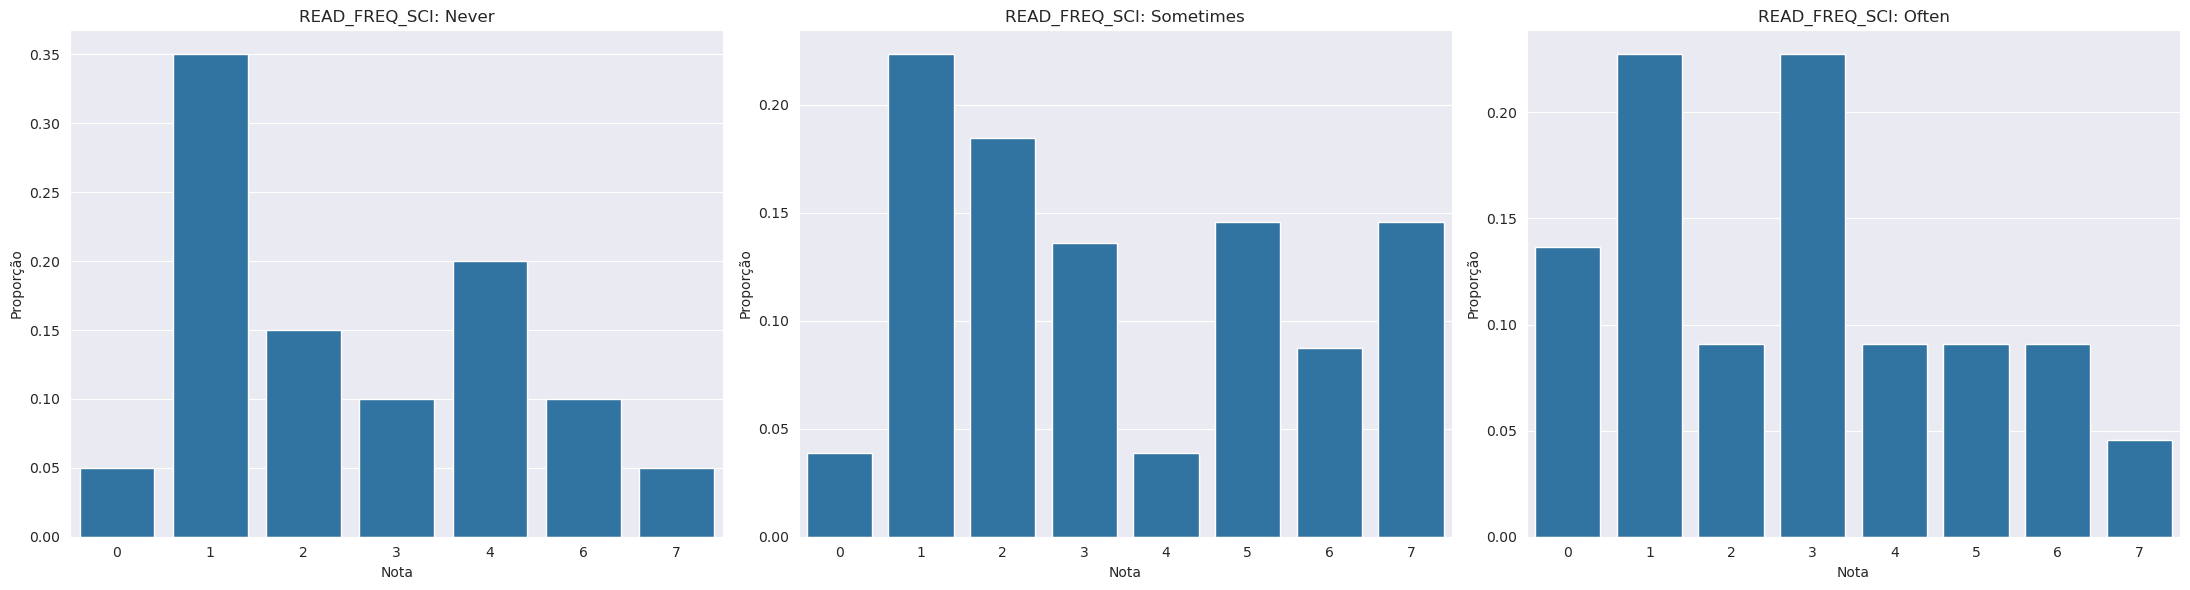

In [227]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_reading_scientific,"READ_FREQ_SCI")

## Attendance to the seminars/conferences related to the department

In [229]:
index_attendance_seminars={1: 'Yes', 2: 'No'}
criar_df_value_counts_proporcao(df_higher_education,index_attendance_seminars,"ATTEND_DEPT",'Attendance Seminars')


,Proporcao (%)
Attendance Seminars,
Yes,0.786207
No,0.213793


In [230]:
nota_media_por_grupo(df_higher_education,index_attendance_seminars,"ATTEND_DEPT",'Attendance Seminars')


GRADE          
                    count      mean
Attendance Seminars                
Yes                   114  3.438596
No                     31  2.451613

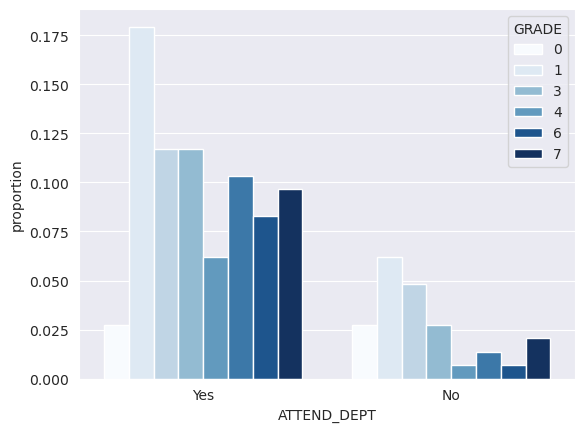

In [233]:
barplot_proporcao_total(df_higher_education,index_attendance_seminars,"ATTEND_DEPT")


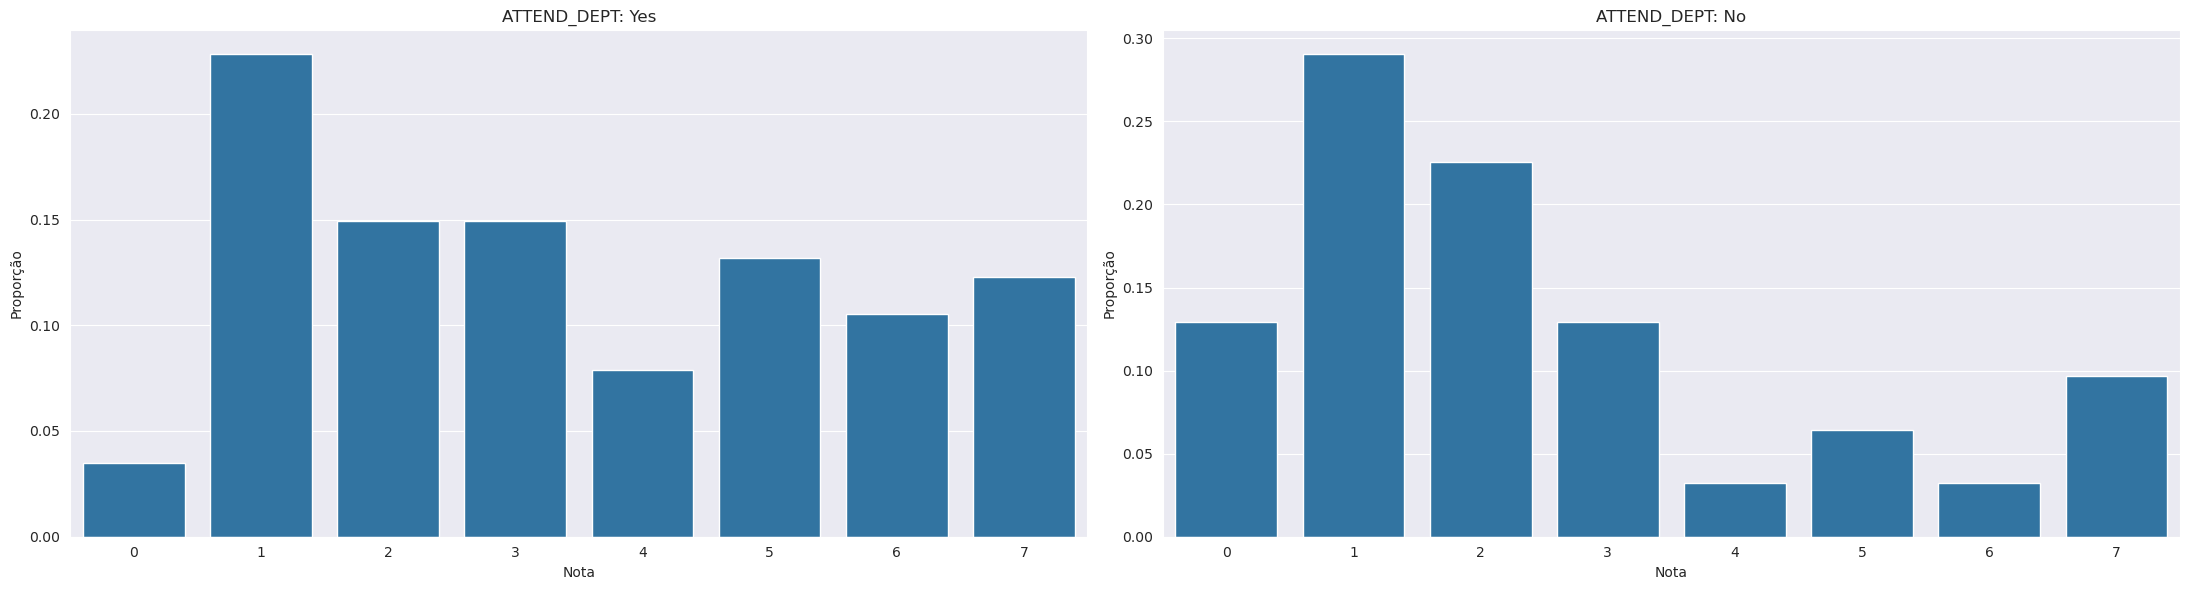

In [234]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_attendance_seminars,"ATTEND_DEPT")

## Impact of your projects/activities on your success

In [235]:
index_impact={1: 'positive', 2: 'negative', 3: 'neutral'}
criar_df_value_counts_proporcao(df_higher_education,index_impact,"IMPACT",'Impact')


,Proporcao (%)
Impact,
positive,0.882759
neutral,0.089655
negative,0.027586


In [236]:
nota_media_por_grupo(df_higher_education,index_impact,"IMPACT",'Impact')


GRADE          
         count      mean
Impact                  
positive   128  3.390625
negative     4  2.250000
neutral     13  1.923077

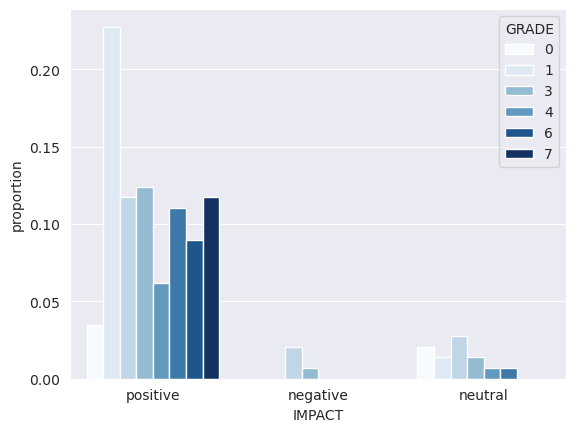

In [237]:
barplot_proporcao_total(df_higher_education,index_impact,"IMPACT")


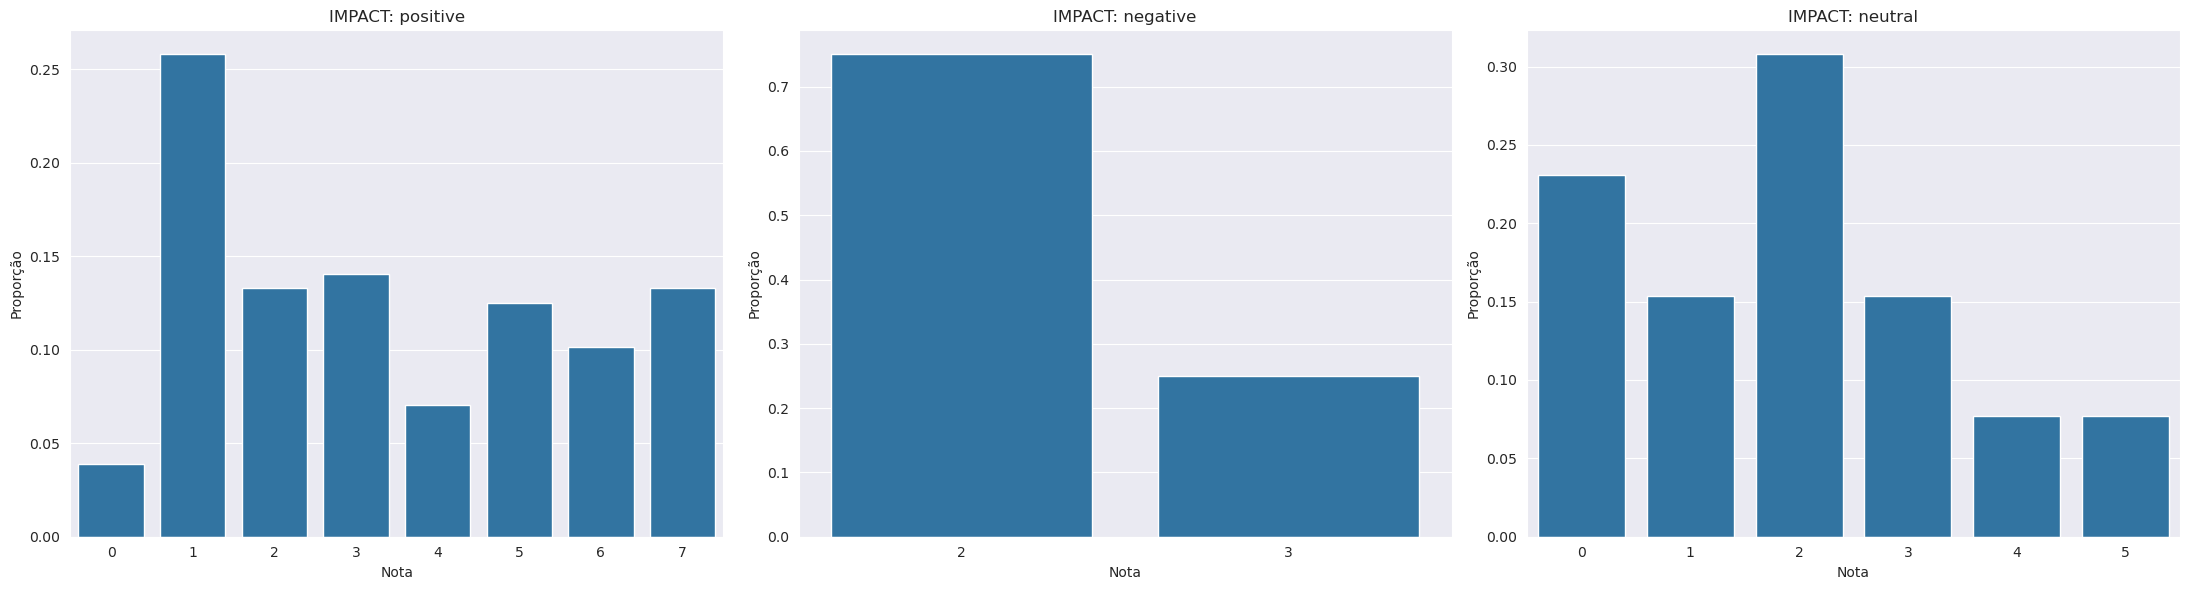

In [238]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_impact,"IMPACT")

## Attendance to classes

In [240]:
index_attendance_classes={1: 'always', 2: 'sometimes', 3: 'never'}
criar_df_value_counts_proporcao(df_higher_education,index_attendance_classes,"ATTEND",'Attendance Classes')


,Proporcao (%)
Attendance Classes,
always,0.758621
sometimes,0.241379


In [241]:
nota_media_por_grupo(df_higher_education,index_attendance_classes,"ATTEND",'Attendance Classes')


GRADE          
                   count      mean
Attendance Classes                
always               110  3.400000
sometimes             35  2.685714

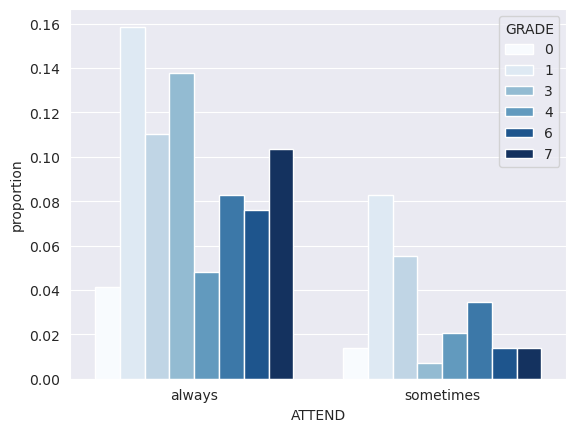

In [243]:
barplot_proporcao_total(df_higher_education,index_attendance_classes,"ATTEND")


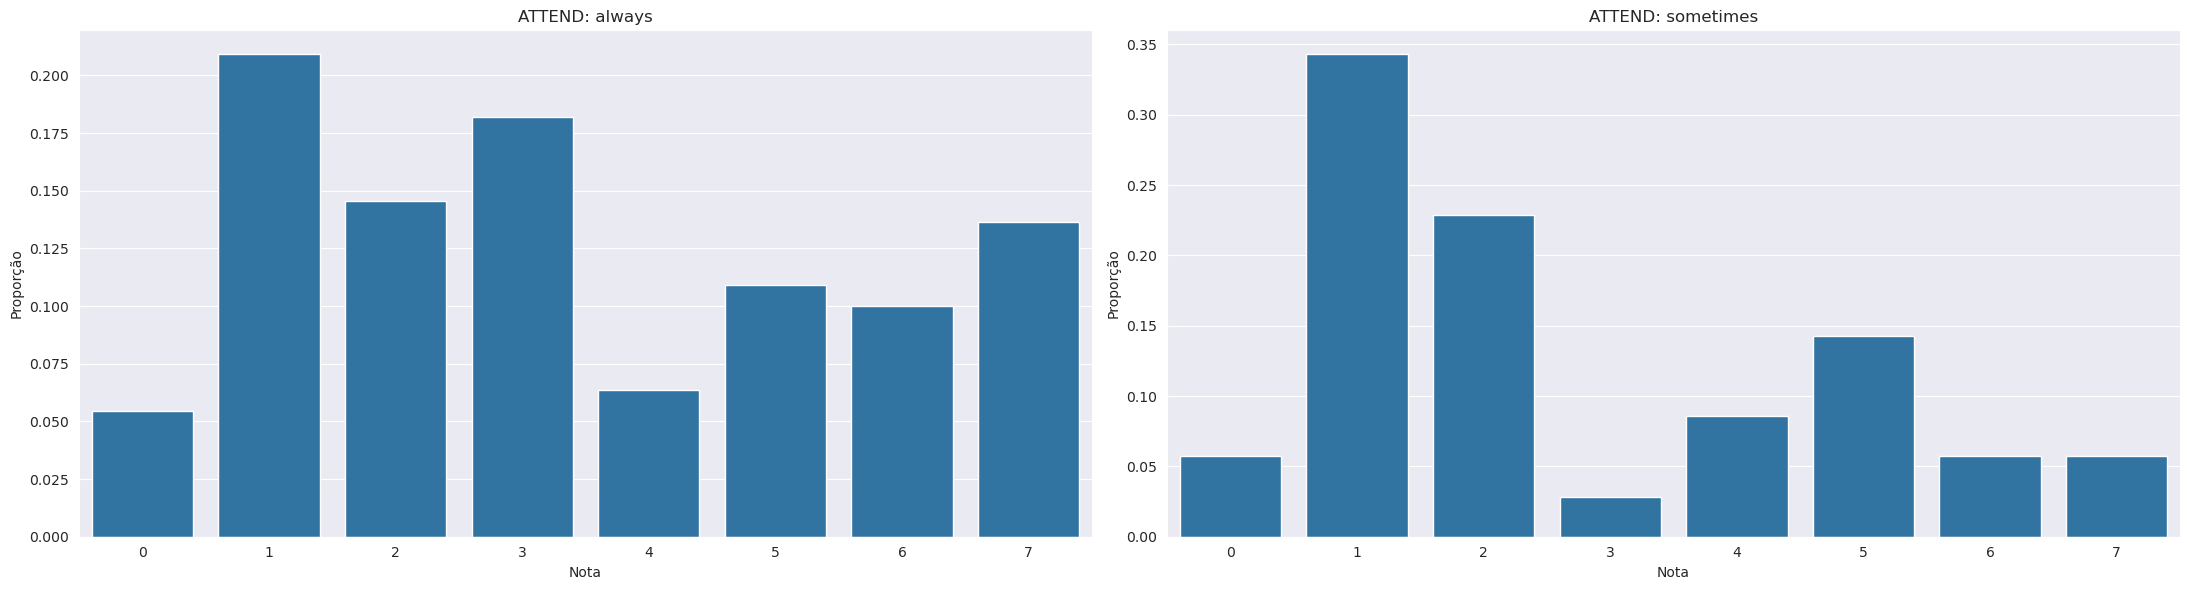

In [242]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_attendance_classes,"ATTEND")

## Preparation to midterm exams 1

In [244]:
index_preparation_1={1: 'alone', 2: 'with friends', 3: 'not applicable'}
criar_df_value_counts_proporcao(df_higher_education,index_preparation_1,"PREP_STUDY",'Study')


,Proporcao (%)
Study,
alone,0.737931
with friends,0.186207
not applicable,0.075862


In [245]:
nota_media_por_grupo(df_higher_education,index_preparation_1,"PREP_STUDY",'Study')


GRADE          
               count      mean
Study                         
alone            107  3.271028
with friends      27  2.777778
not applicable    11  3.909091

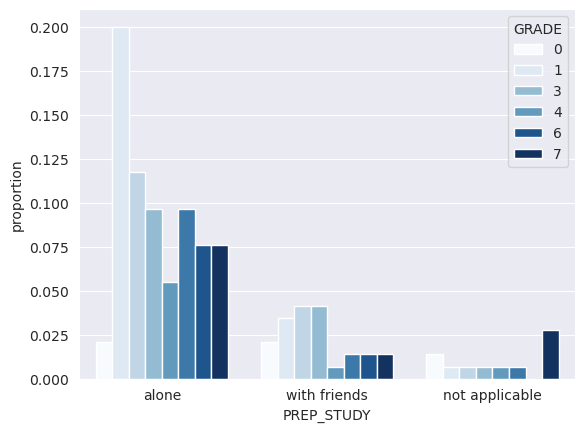

In [246]:
barplot_proporcao_total(df_higher_education,index_preparation_1,"PREP_STUDY")


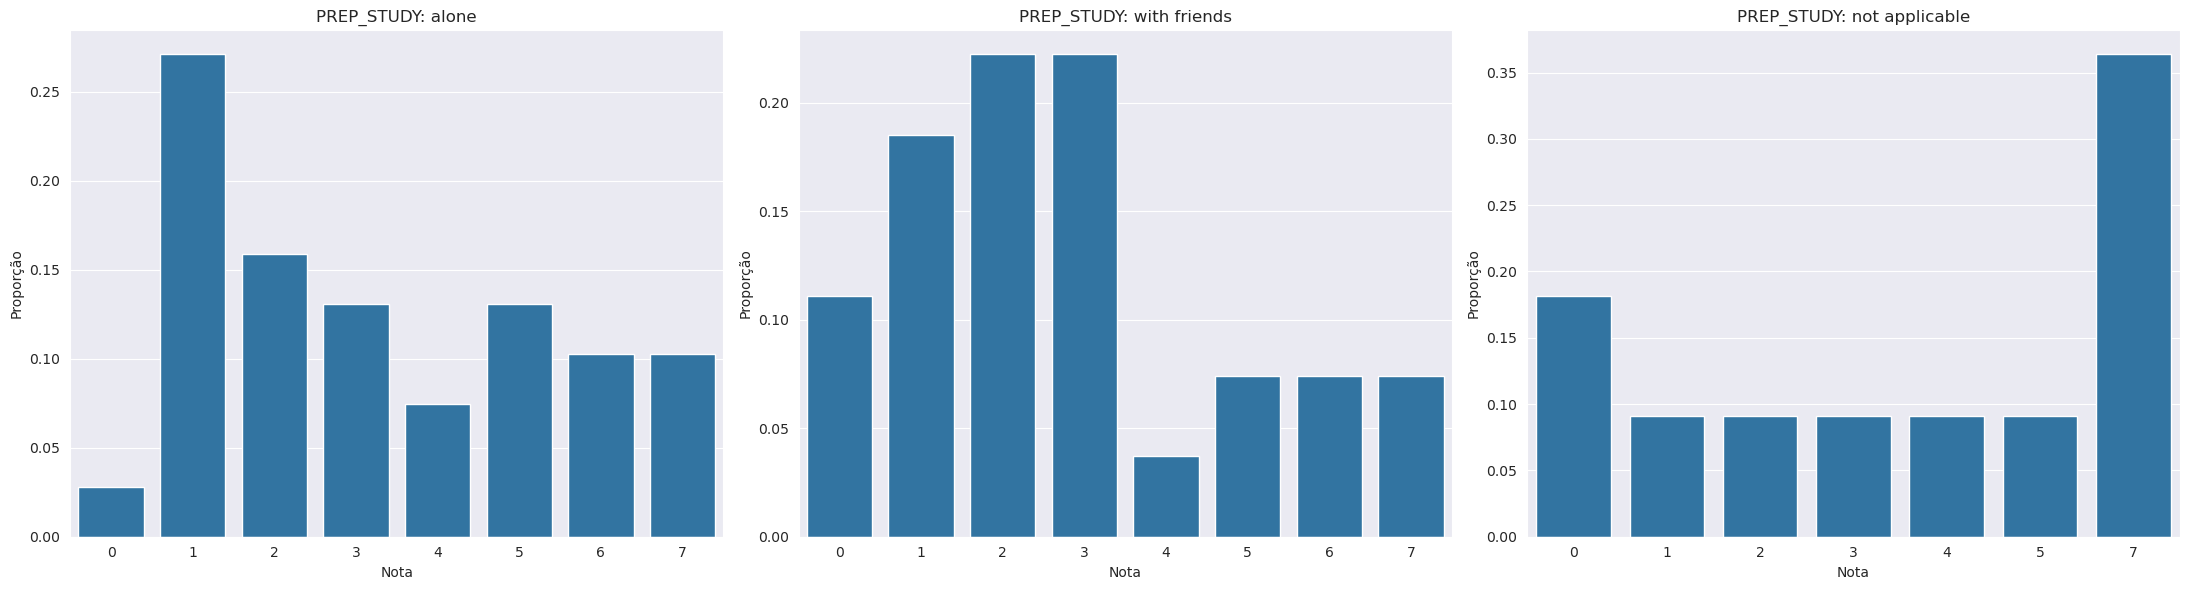

In [247]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_preparation_1,"PREP_STUDY")

## Preparation to midterm exams 2

In [249]:
index_preparation_2={1: 'closest date to the exam', 2: 'regularly during the semester', 3: 'never'}
criar_df_value_counts_proporcao(df_higher_education,index_preparation_2,"PREP_EXAM",'Study')


,Proporcao (%)
Study,
closest date to the exam,0.848276
regularly during the semester,0.137931
never,0.013793


In [250]:
nota_media_por_grupo(df_higher_education,index_preparation_2,"PREP_EXAM",'Study')

GRADE          
                              count      mean
Study                                        
closest date to the exam        123  3.178862
regularly during the semester    20  3.350000
never                             2  5.000000

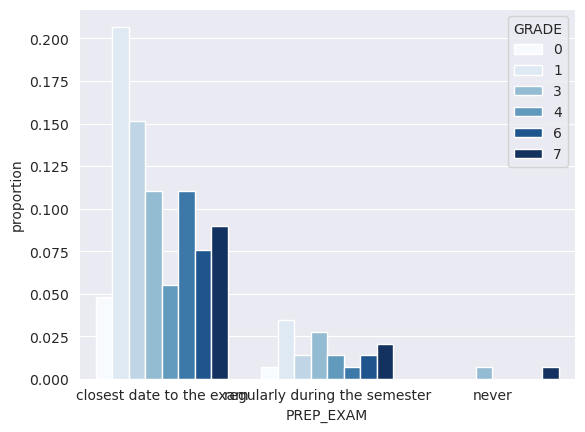

In [251]:
barplot_proporcao_total(df_higher_education,index_preparation_2,"PREP_EXAM")

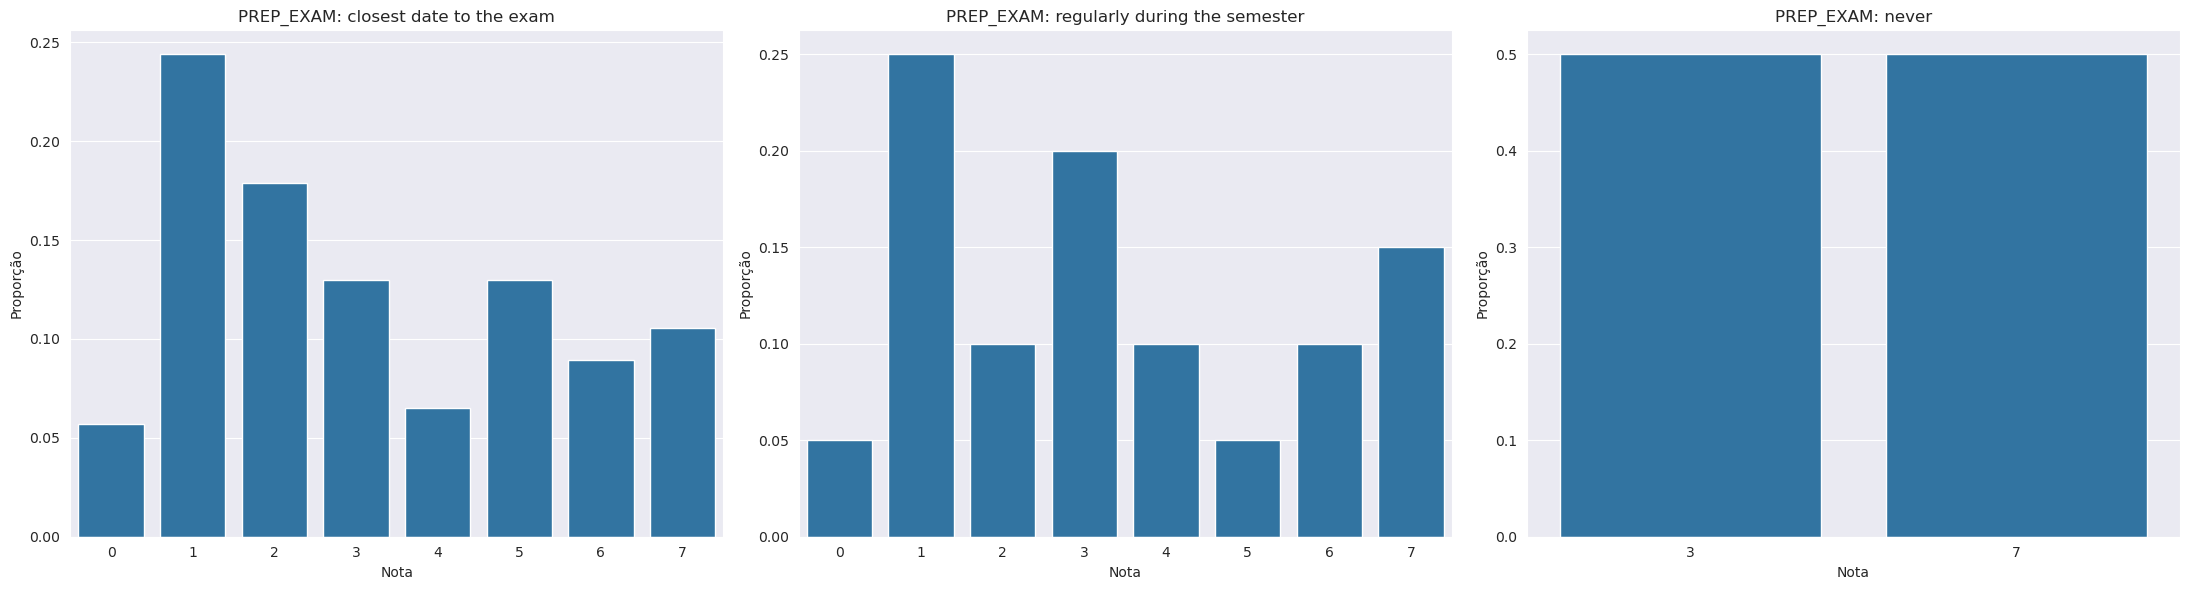

In [252]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_preparation_2,"PREP_EXAM")

## Taking notes in classes

In [253]:
index_notes={1: 'never', 2: 'sometimes', 3: 'always'}
criar_df_value_counts_proporcao(df_higher_education,index_notes,"NOTES",'Notes')

,Proporcao (%)
Notes,
always,0.579310
sometimes,0.386207
never,0.034483


In [255]:
nota_media_por_grupo(df_higher_education,index_notes,"NOTES",'Notes')

GRADE          
          count      mean
Notes                    
never         5  1.800000
sometimes    56  3.339286
always       84  3.238095

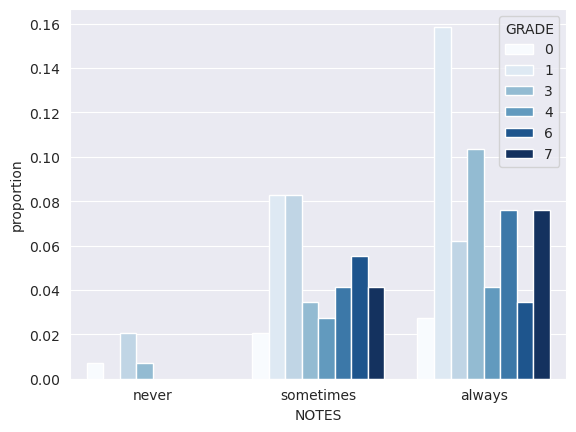

In [256]:
barplot_proporcao_total(df_higher_education,index_notes,"NOTES")

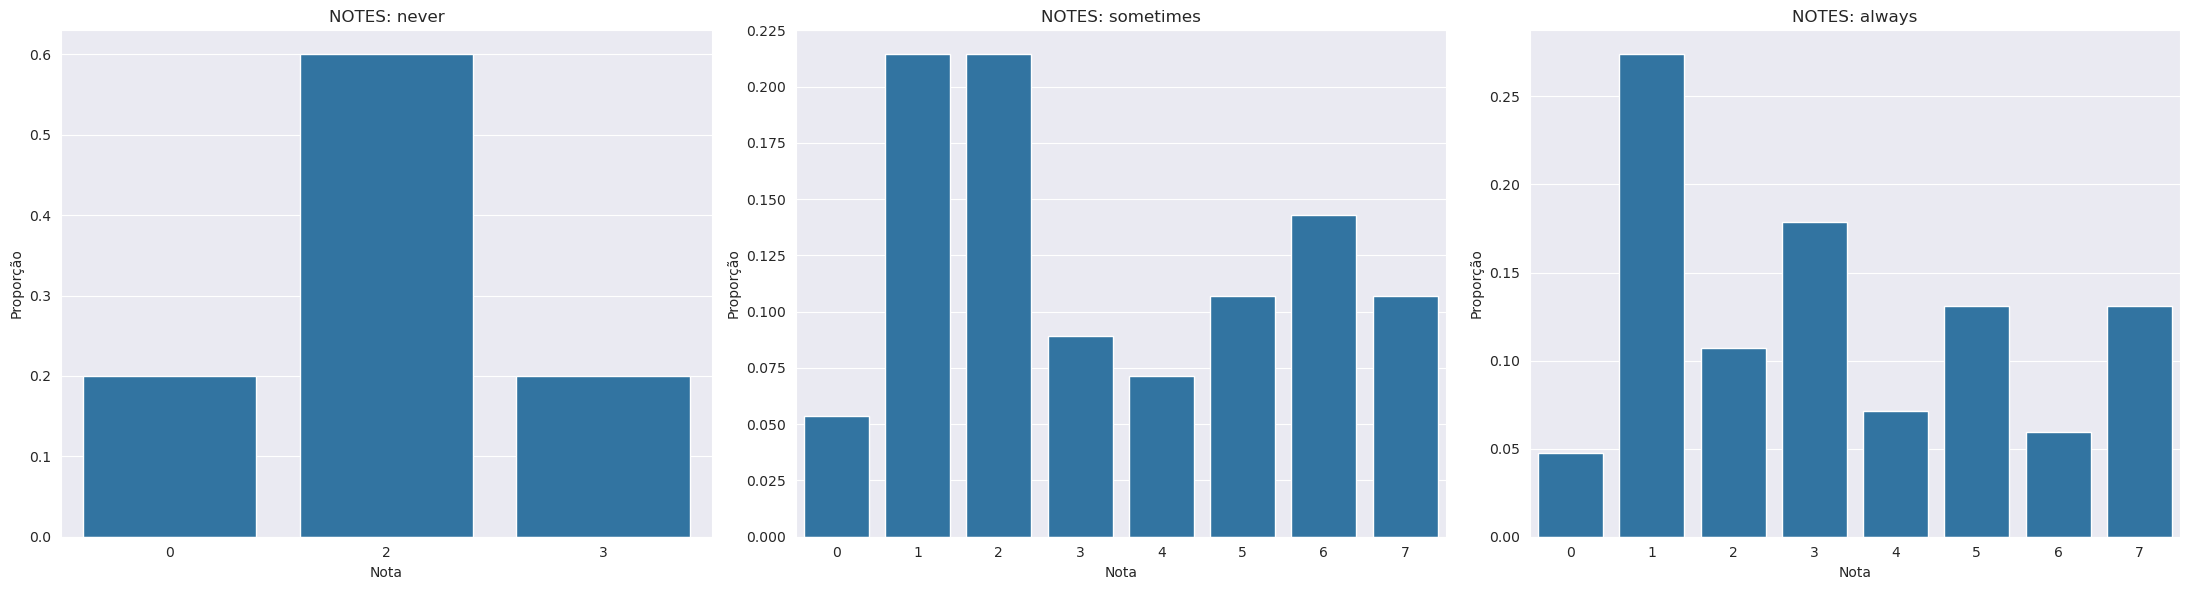

In [257]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_notes,"NOTES")

## Listening in classes

In [258]:
index_listening_class={1: 'never', 2: 'sometimes', 3: 'always'}
criar_df_value_counts_proporcao(df_higher_education,index_listening_class,"LISTENS",'Listening in Class')

,Proporcao (%)
Listening in Class,
sometimes,0.544828
always,0.255172
never,0.200000


In [259]:
nota_media_por_grupo(df_higher_education,index_listening_class,"LISTENS",'Listening in Class')


GRADE          
                   count      mean
Listening in Class                
never                 29  2.827586
sometimes             79  3.291139
always                37  3.405405

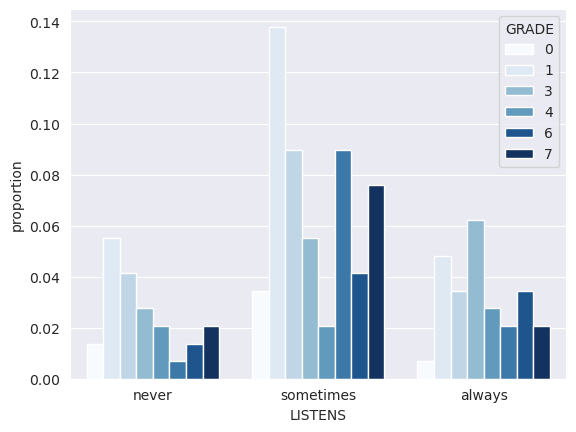

In [260]:
barplot_proporcao_total(df_higher_education,index_listening_class,"LISTENS")


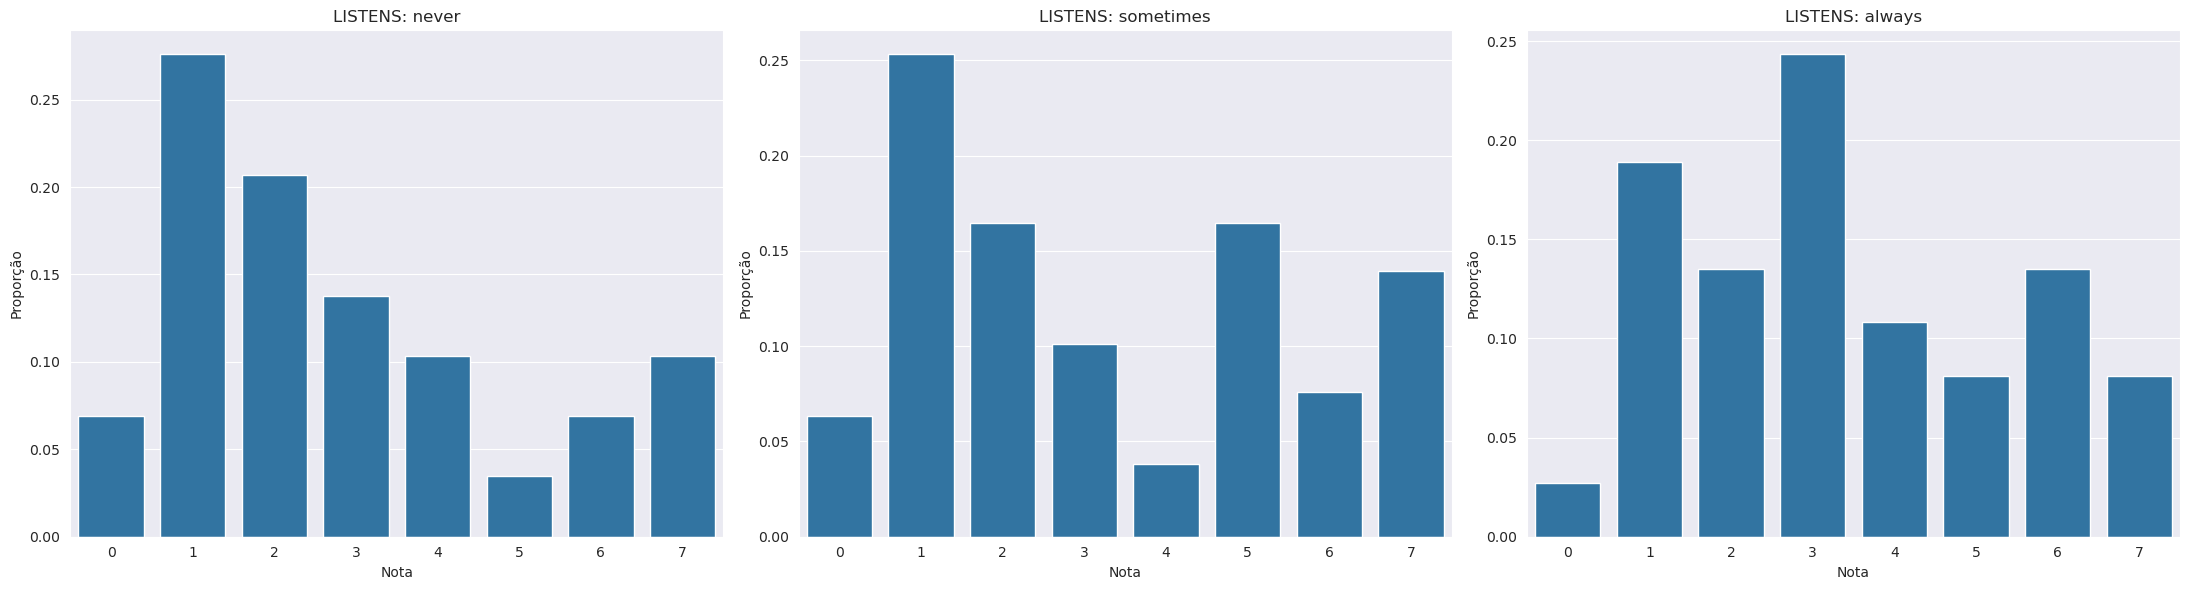

In [261]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_listening_class,"LISTENS")

## Discussion improves my interest and success in the course

In [263]:
index_discussion={1: 'never', 2: 'sometimes', 3: 'always'}
criar_df_value_counts_proporcao(df_higher_education,index_discussion,"LIKES_DISCUSS",'Likes Discussion')


,Proporcao (%)
Likes Discussion,
sometimes,0.482759
always,0.455172
never,0.062069


In [266]:
nota_media_por_grupo(df_higher_education,index_discussion,"LIKES_DISCUSS",'Likes Discussion')


GRADE          
                 count      mean
Likes Discussion                
never                9  2.000000
sometimes           70  3.142857
always              66  3.484848

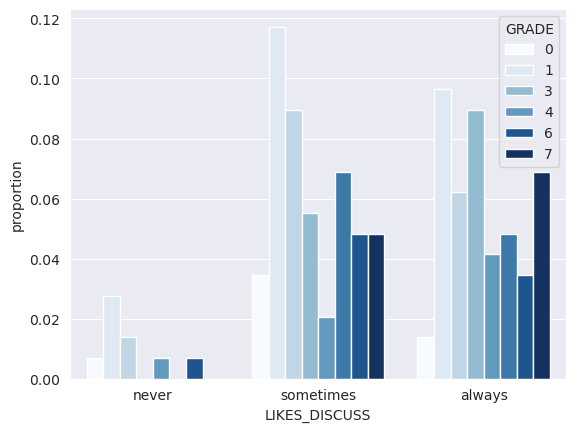

In [265]:
barplot_proporcao_total(df_higher_education,index_discussion,"LIKES_DISCUSS")


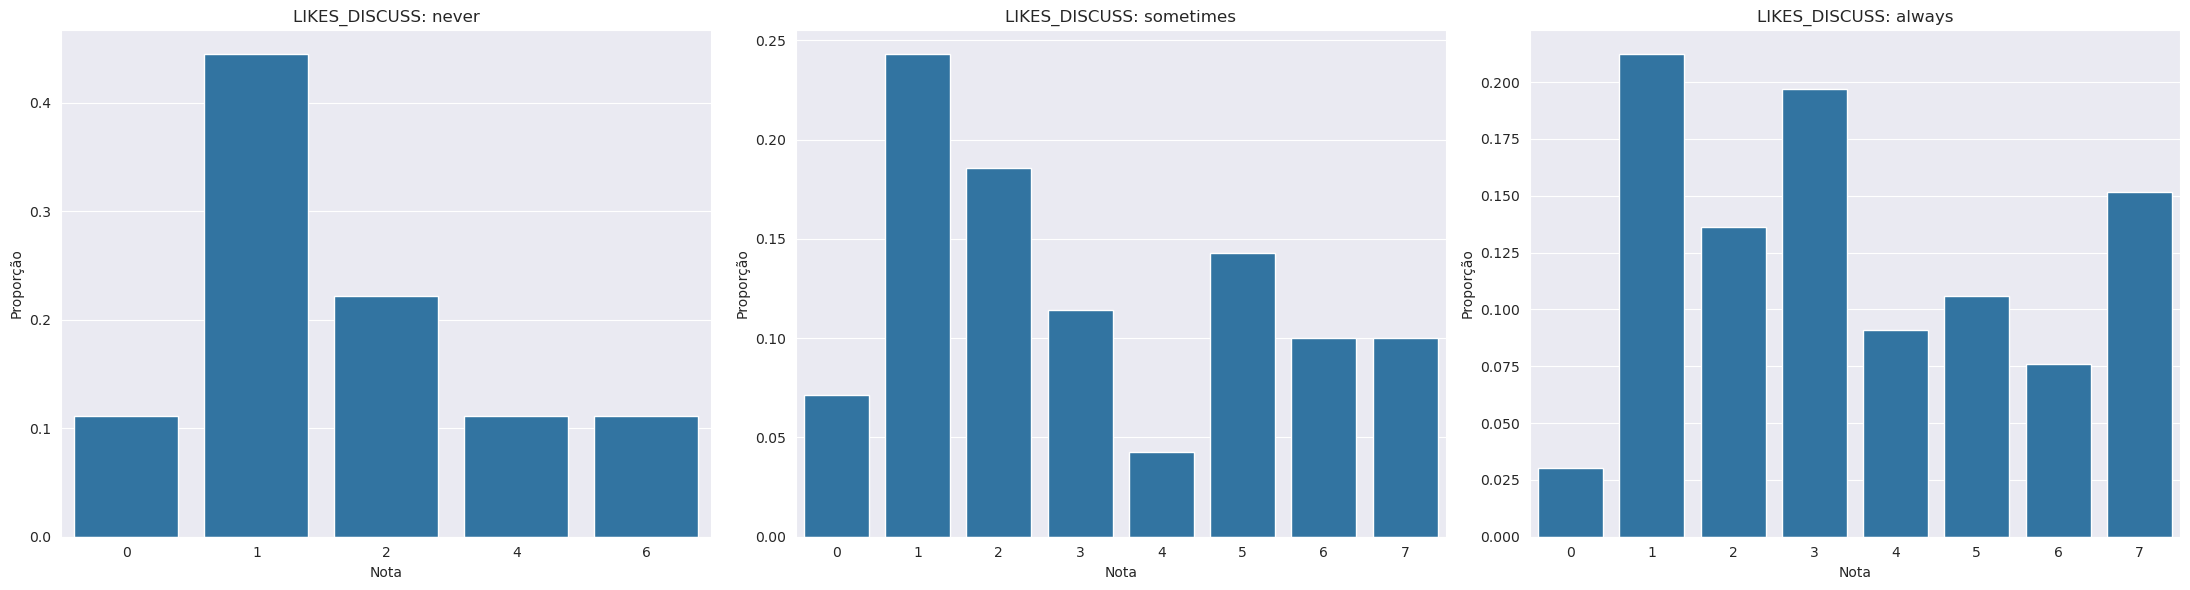

In [264]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_discussion,"LIKES_DISCUSS")

## Flip-classroom

In [268]:
index_classroom={1: 'not useful', 2: 'useful', 3: 'not applicable'}
criar_df_value_counts_proporcao(df_higher_education,index_classroom,"CLASSROOM",'Flip Classroom')

,Proporcao (%)
Flip Classroom,
not useful,0.441379
useful,0.310345
not applicable,0.248276


In [269]:
nota_media_por_grupo(df_higher_education,index_classroom,"CLASSROOM",'Flip Classroom')

GRADE          
               count      mean
Flip Classroom                
not useful        64  2.890625
useful            45  3.555556
not applicable    36  3.416667

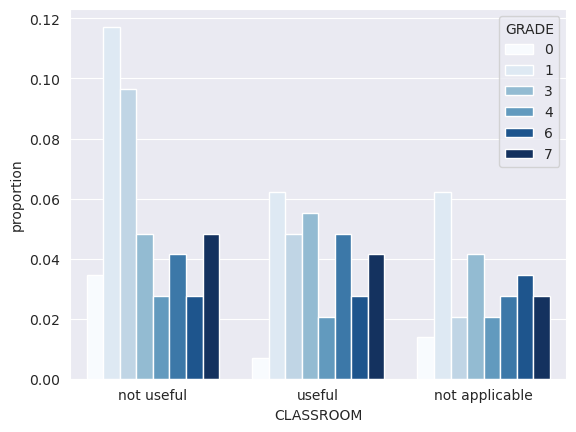

In [270]:
barplot_proporcao_total(df_higher_education,index_classroom,"CLASSROOM")

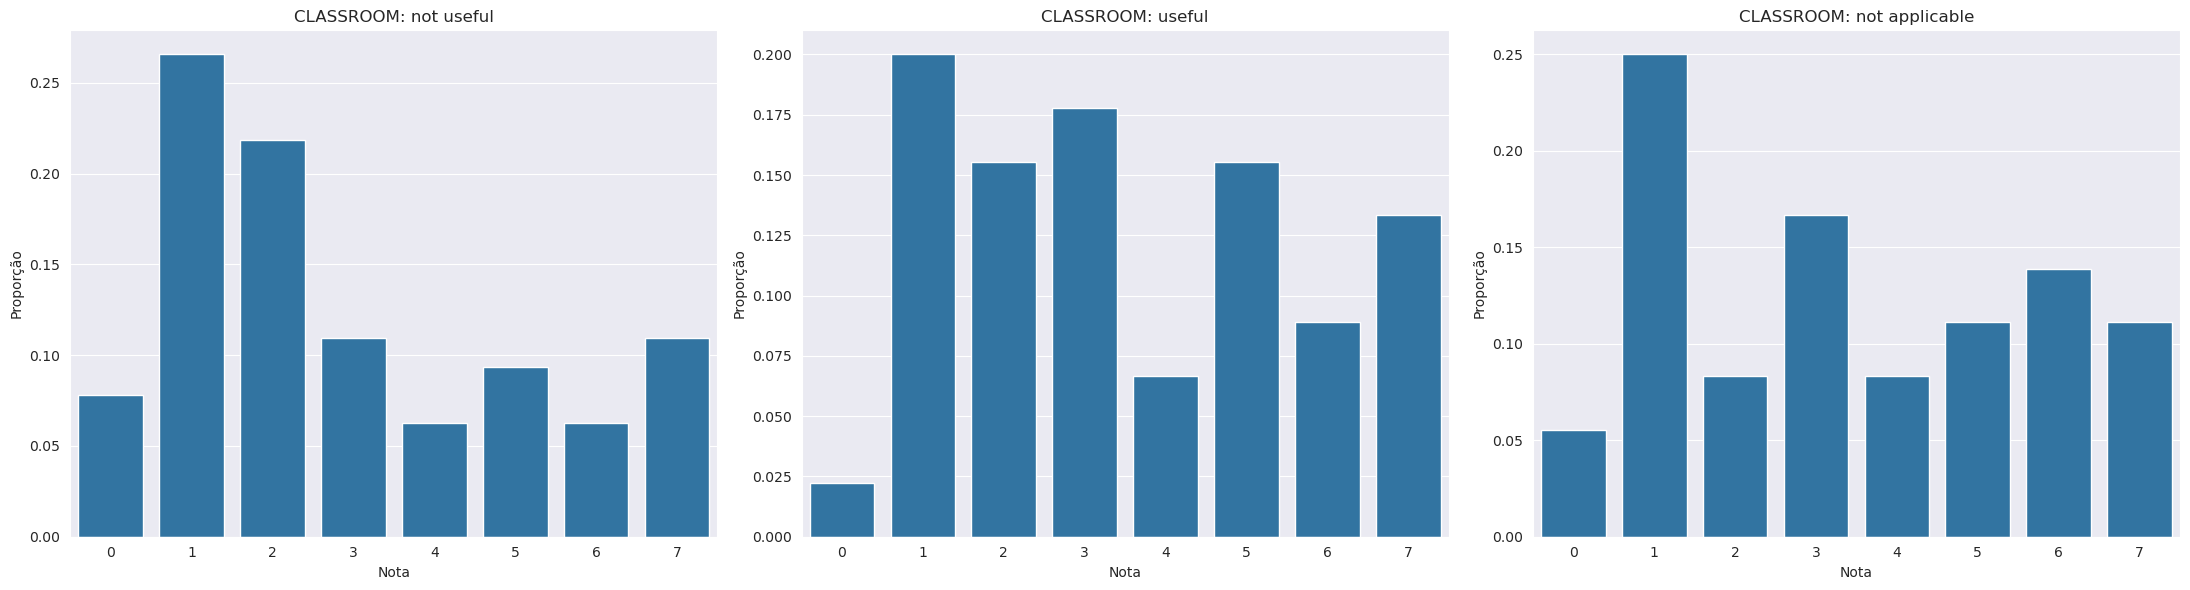

In [271]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_classroom,"CLASSROOM")

## Cumulative grade point average in the last semester

In [273]:
index_grade_last_semester={1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'}
criar_df_value_counts_proporcao(df_higher_education,index_grade_last_semester,"CUML_GPA",'Cumulative GPA')

,Proporcao (%)
Cumulative GPA,
3.00-3.49,0.275862
2.00-2.49,0.262069
2.50-2.99,0.172414
above 3.49,0.172414
<2.00,0.117241


In [274]:
nota_media_por_grupo(df_higher_education,index_grade_last_semester,"CUML_GPA",'Cumulative GPA')

GRADE          
               count      mean
Cumulative GPA                
<2.00             17  2.235294
2.00-2.49         38  2.289474
2.50-2.99         25  3.920000
3.00-3.49         40  3.475000
above 3.49        25  4.240000

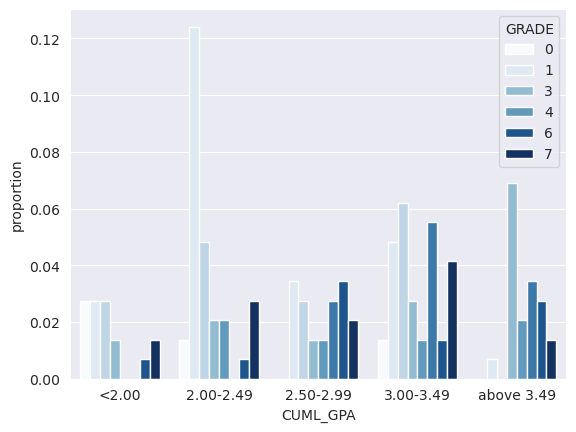

In [275]:
barplot_proporcao_total(df_higher_education,index_grade_last_semester,"CUML_GPA")

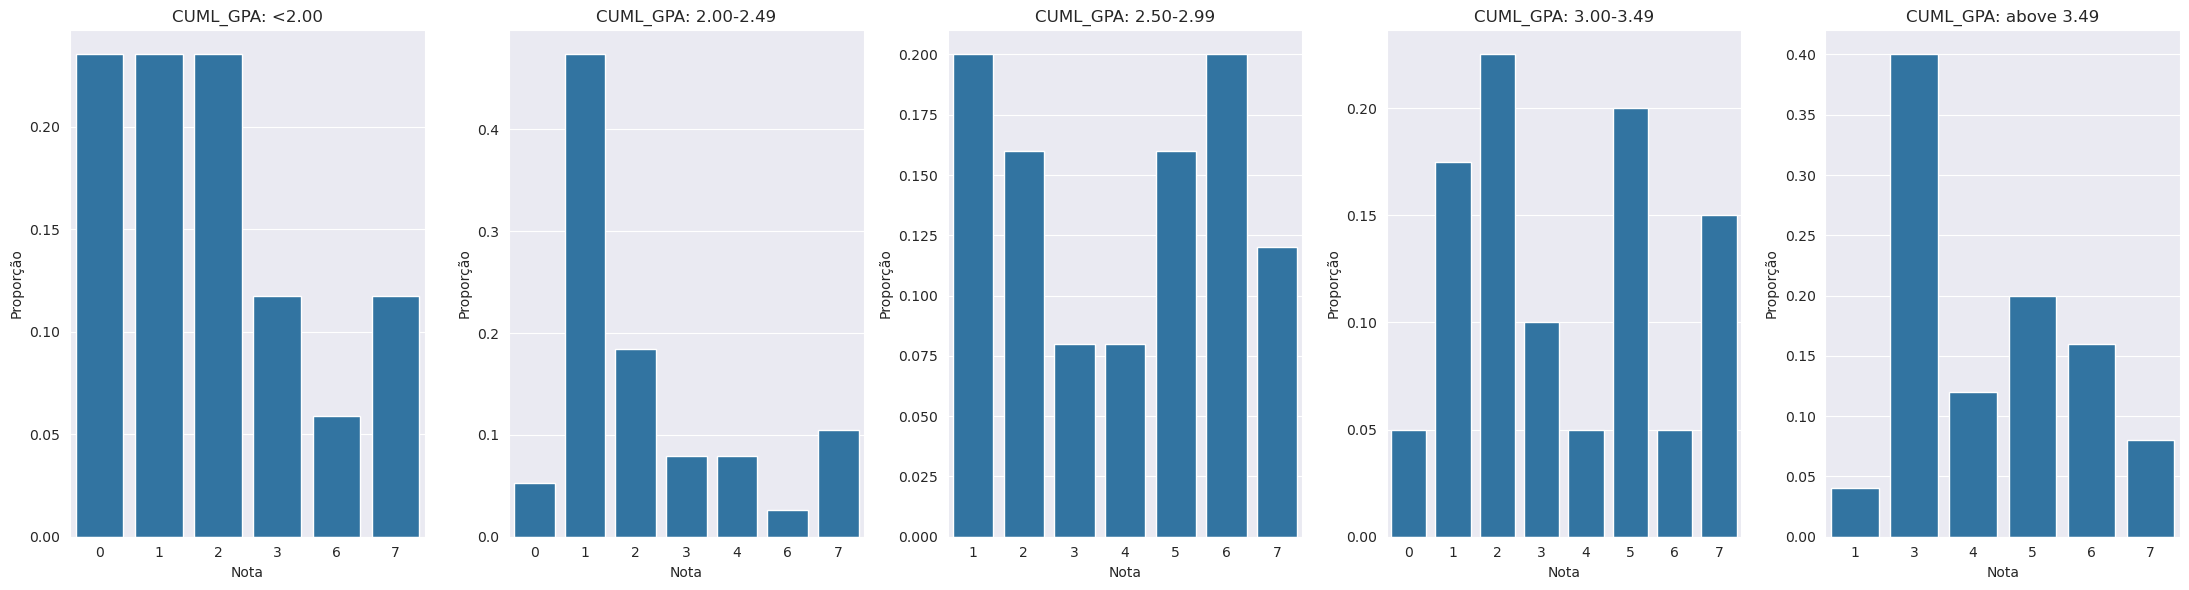

In [276]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_grade_last_semester,"CUML_GPA")

## Expected Cumulative grade point average in the graduation

In [277]:
index_expected_GPA={1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'}
criar_df_value_counts_proporcao(df_higher_education,index_expected_GPA,"EXP_GPA",'Expected GPA')

,Proporcao (%)
Expected GPA,
2.50-2.99,0.420690
2.00-2.49,0.262069
3.00-3.49,0.206897
<2.00,0.110345


In [278]:
nota_media_por_grupo(df_higher_education,index_expected_GPA,"EXP_GPA",'Expected GPA')

GRADE          
             count      mean
Expected GPA                
<2.00           16  2.437500
2.00-2.49       38  2.842105
2.50-2.99       61  3.147541
3.00-3.49       30  4.300000

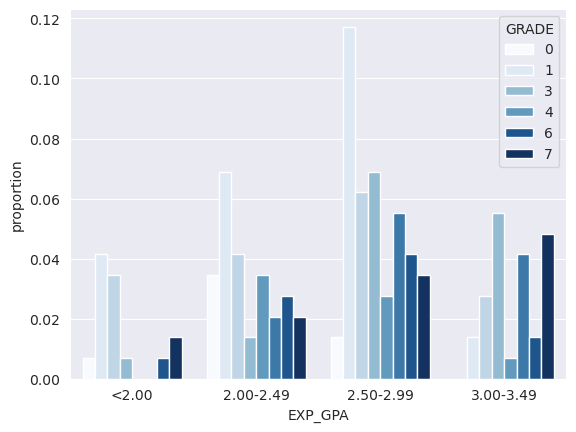

In [280]:
barplot_proporcao_total(df_higher_education,index_expected_GPA,"EXP_GPA")

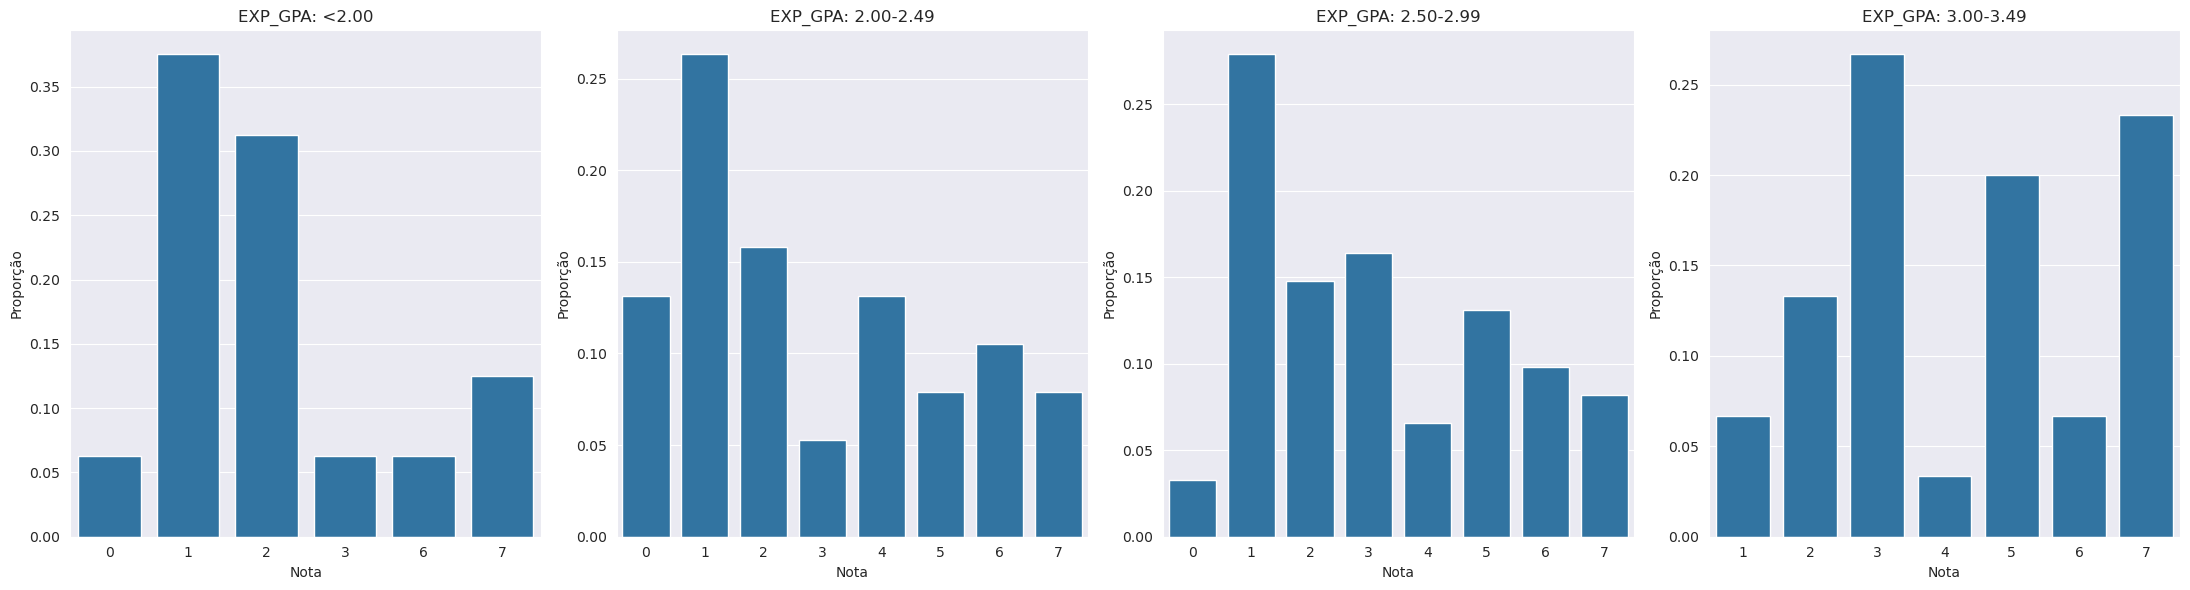

In [281]:
gerar_subplot_proporcao_por_grupo(df_higher_education,index_expected_GPA,"EXP_GPA")

# Correlação

In [6]:
#Variáveis que podem ser ordenadas
ordinals=['AGE','SCHOLARSHIP','SALARY','MOTHER_EDU','FATHER_EDU','#_SIBLINGS','STUDY_HRS','READ_FREQ',
            'READ_FREQ_SCI','ATTEND','CUML_GPA','EXP_GPA','PREP_EXAM','NOTES','LISTENS','LIKES_DISCUSS',"GRADE"]

#Variáveis categóricas
categoricals=['GENDER','HS_TYPE','WORK','ACTIVITY','PARTNER','TRANSPORT','LIVING','PARENTAL STATUS','MOTHER_JOB','FATHER_JOB','ATTEND_DEPT','IMPACT','PREP_STUDY',
            'CLASSROOM','COURSE ID','GRADE']

## Categorical Variables

### Teste Chi-Quadrado e Cramer V

Para calcular a correlação entre variáveis categóricas será usado o teste chi-quadrado. Tutoriais simples a respeito desse teste podem ser encontrados no seguintes links:

- https://datascientest.com/en/calculate-correlation-between-two-variables-how-do-you-measure-dependence
- https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6
- https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7

Para o teste chi-quadrado serão consideradas duas hipótesetes:

     1) Hipótese nula: variáveis são independentes;
     2) Hipótese alternativa: variáveis não são independentes.


O teste chi-quadrados vai indicar se existe ou não uma relação entre as variáveis. A limitação desse teste é que ele não quantifica o tamanho da associação. O teste Cramer V será usado para superar essa limitação. O resultado do teste Cramer V é um valor entre 0 e 1, onde 0 significa nenhuma associação e 1 associação completa. Um tutorial a respeito do teste Cramer pode ser encontrado no seguinte link:

- https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6


In [7]:
#Função para calcular os valores p do teste Chi-quadrado, os valores do teste Cramer e os graus de liberdade desse mesmo teste

def association_categorical_features(data):
    '''
    Função para calcular a correlação entre variáveis categóricas.
    Para o calculo será usado o teste chi-quadrado para indicar se existe associação entre as variáveis e o teste Cramaer V para mensusar a associação

    Inputs:
        data- Pandas dataframe somente com variáveis categóricas
    
    Outuputs
        chi_squared_matrix - pandas dataframe com os coeficiente p calculados utilizando o teste chi-quadrado
        cramers_matrix     - pandas dataframe com os valores indicando o nivel de associação entre as variáveis. PAra esse cáculo foi usado o teste Cramer
        cramers_df_matrix  - pandas dataframe. Graus de liberdade no teste Cramer. NEcessário para interpretação dos valores
    '''
    columns=data.columns
    n_columns=len(data.columns)
    cramers_matrix     =np.ones(shape=[n_columns,n_columns])
    chi_squared_matrix=np.ones(shape=[n_columns,n_columns])
    cramers_df_matrix =np.ones(shape=[n_columns,n_columns])
    #itertools.combinations - it is an alternative to using two for loops
    for i in range(n_columns):
        for j in range(i+1,n_columns):
            x=data[[columns[i],columns[j]]].copy()
            x.dropna(inplace=True)
            names=x.columns
            x=pd.crosstab(x[names[0]],x[names[1]])
            chi2, p, dof, con_table = chi2_contingency(x)
            chi_squared_matrix[i,j]=p
            chi_squared_matrix[j,i]=p

            #Calculo do coeficiente de Cramer V
            #Para calculo será usada correcao para evitar bias
            n=x.values.sum() #Numero total de elementos
            r, k = x.shape   #número de linhas e de colunas
            phi2 = chi2 / n  #Acessar links acima para formula do coeficiente Cramer
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) 
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_dof=min(x.shape)-1 #calculo degree of freedom
            if min((kcorr-1), (rcorr-1)) !=0: #Testar para valor nulo no denominador
                cramers_v=np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) 
            else: 
                cramers_v=0
            cramers_matrix[i,j]=cramers_v
            cramers_matrix[j,i]=cramers_v
            cramers_df_matrix[i,j]=cramers_dof
            cramers_df_matrix[j,j]=cramers_dof
    chi_squared_matrix=pd.DataFrame(chi_squared_matrix,index=columns,columns=columns)
    cramers_df_matrix=pd.DataFrame(cramers_df_matrix,index=columns,columns=columns)
    cramers_matrix=pd.DataFrame(cramers_matrix,index=columns,columns=columns)
    return chi_squared_matrix,cramers_matrix,cramers_df_matrix


In [8]:
#Plotar heat map para indicar se existe ou não associação entre as variáveis

def heat_map_significance(df_p_values,alpha,size=[12,8]):
    '''
    Função para plotar heat map com as cores indicando se existe ou não associação entre as variáveis

    Inputs:
       df_p_values: pandas dataframe com os p values calculados usado o teste chi-quadrado
       alpha      : nivel de significância

    '''
    cmap = sns.mpl_palette("Set1", 2) #Return a palette or colormap from the matplotlib registry.
    legend_handles = [Patch(color=cmap[True], label='Dependente'),  # red
                  Patch(color=cmap[False], label='Independente')]  # green
    plt.legend(handles=legend_handles, ncol=2, bbox_to_anchor=[0.5, 1.02], loc='lower center', 
           fontsize=8, handlelength=.8)
    sns.heatmap(df_p_values<alpha,cmap=cmap,cbar=False)

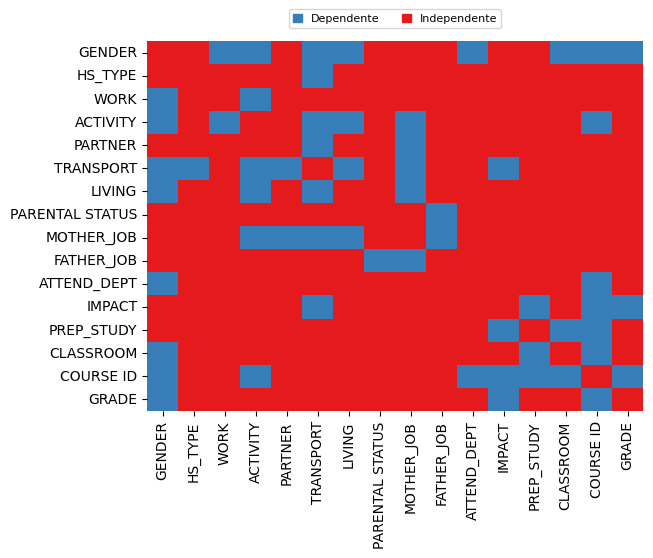

In [9]:
#Criar heat map informando dependência ou indepenência entre variáveis 


df_chi_quadrado,df_cramer,df_cramer_degrees_freedom=association_categorical_features(df_higher_education[categoricals])
heat_map_significance(df_chi_quadrado,0.05)

#### Interpretação Cramer

In [10]:
#A função interpretacao_cramer converte o valor de um Cramer para um nivel de associação que é facilmente interpretável
#A função converter_df_cramer_values_niveis converte um dataframe contendo os valores do teste Cramer entre diversas variáveis e converte todos esses valoores para niveis facilmente interpretáveis.
#A função converter_df_cramer_values_niveis utiliza a função interpretacao_cramer

def interpretacao_cramer(degrees_freedom,cramer_value):
    '''
    Interpretação do valores do teste Cramer utilizando os graus de liberdade (degrees of freedom)
    Os valores usados para interpretação baseiam-se em  Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed).
    Converte um valor do teste Cramer e o grau de liberdade correspondente para um nivel de associação entre variáveis

    Inputs-
        degrees_freedom - graus de liberdade
        cramer_value    - valor calculado para o teste Cramer

    Outputs-
        String indicando o nivel de associação entre as variáveis

    '''
    if degrees_freedom==1:
        if cramer_value<=0.1:
            i='negligenciavel'
        elif 0.1<cramer_value<=0.3:
            i='pequeno'
        elif 0.3<cramer_value<=0.5:
            i='medio'
        else:
            i='grande'

    if degrees_freedom==2:
        if cramer_value<=0.07:
            i='negligenciavel'
        elif 0.07<cramer_value<=0.21:
            i='pequeno'
        elif 0.21<cramer_value<=0.35:
            i='medio'
        else:
            i='grande'

    if degrees_freedom==3:
        if cramer_value<=0.06:
            i='negligenciavel'
        elif 0.06<cramer_value<=0.17:
            i='pequeno'
        elif 0.17<cramer_value<=0.29:
            i='medio'
        else:
            i='grande'

    if degrees_freedom==4:
        if cramer_value<=0.05:
            i='negligenciavel'
        elif 0.05<cramer_value<=0.15:
            i='pequeno'
        elif 0.15<cramer_value<=0.25:
            i='medio'
        else:
            i='grande'

    if degrees_freedom>=5:
        if cramer_value<=0.05:
            i='negligenciavel'
        elif 0.05<cramer_value<=0.13:
            i='pequeno'
        elif 0.13<cramer_value<=0.22:
            i='medio'
        else:
            i='grande'

    return i

def converter_df_cramer_values_niveis(cramers_value,cramers_df,converter_valor_nivel=interpretacao_cramer):
    '''
    Função que vai converter um dataframe contendo os valores do teste Cramer entre variáveis para um dataframe contendo níveis de associação entre as variáveis.
    São possíveis quatro níveis de associação:negligenciável,pequeno,médio e fraco
    

    Inputs
        cramers_value         - Pandas dataframe com os valores do teste Cramer para as variáveis
        cramers_df            - Pandas dataframe com os graus de liberdade do teste Cramer entre as variáveis
        converter_valor_nivel - Função para converter um único valor de Cramer e de grau de liberdade para um unível de associação
    Outputs
        level - PAndas dataframe com os niveis de associação entre as variáveis
    '''
    level=cramers_value.copy().astype('string')
    n=level.shape[0]
    for i in range(n):
        for j in range(n):
            df=cramers_df.iloc[i,j]
            cv=cramers_value.iloc[i,j]
            level.iloc[i,j]=converter_valor_nivel(df,cv)
    return level


In [12]:
nivel_associacao_cramer=converter_df_cramer_values_niveis(df_cramer,df_cramer_degrees_freedom)
nivel_associacao_cramer

,GENDER,HS_TYPE,WORK,ACTIVITY,PARTNER,TRANSPORT,LIVING,PARENTAL STATUS,MOTHER_JOB,FATHER_JOB,ATTEND_DEPT,IMPACT,PREP_STUDY,CLASSROOM,COURSE ID,GRADE
GENDER,grande,negligenciavel,pequeno,pequeno,negligenciavel,pequeno,pequeno,negligenciavel,negligenciavel,negligenciavel,medio,negligenciavel,pequeno,pequeno,grande,medio
HS_TYPE,negligenciavel,grande,pequeno,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,negligenciavel,pequeno,negligenciavel,pequeno,pequeno,negligenciavel,pequeno,negligenciavel
WORK,pequeno,pequeno,grande,pequeno,negligenciavel,pequeno,pequeno,pequeno,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno
ACTIVITY,pequeno,negligenciavel,pequeno,grande,negligenciavel,pequeno,pequeno,negligenciavel,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,medio,pequeno
PARTNER,negligenciavel,negligenciavel,negligenciavel,negligenciavel,grande,pequeno,pequeno,negligenciavel,pequeno,pequeno,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno
TRANSPORT,pequeno,pequeno,pequeno,pequeno,pequeno,grande,grande,negligenciavel,medio,pequeno,negligenciavel,pequeno,pequeno,negligenciavel,pequeno,pequeno
LIVING,pequeno,negligenciavel,pequeno,pequeno,pequeno,medio,grande,negligenciavel,medio,pequeno,pequeno,negligenciavel,pequeno,negligenciavel,pequeno,pequeno
PARENTAL STATUS,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,grande,pequeno,medio,negligenciavel,negligenciavel,pequeno,negligenciavel,pequeno,negligenciavel
MOTHER_JOB,negligenciavel,negligenciavel,negligenciavel,pequeno,pequeno,pequeno,pequeno,pequeno,grande,medio,pequeno,negligenciavel,pequeno,negligenciavel,pequeno,pequeno
FATHER_JOB,negligenciavel,negligenciavel,pequeno,negligenciavel,pequeno,pequeno,negligenciavel,pequeno,pequeno,grande,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno


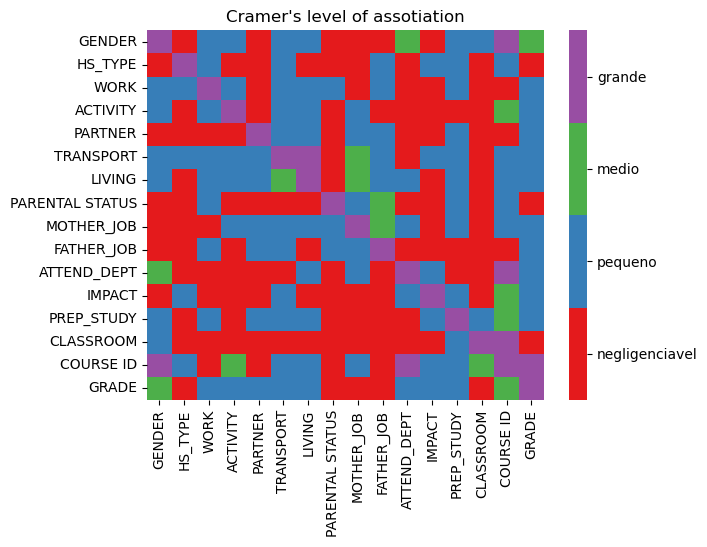

In [13]:
#Plotar um heat map com o nivel de associacao

def converter_nivel_para_numerico(nivel):
      '''
      Função que converte cada nivel de associação para um valor numérico. Esses valores numéricos permitirão a criação de um heatmap
      '''
      if nivel=='grande':
        return 255
      if nivel=='medio':
        return 128
      if nivel=='pequeno':
        return 64 
      if nivel=='negligenciavel':
        return 0

nivel_associacao_cramer_numerico=nivel_associacao_cramer.map(converter_nivel_para_numerico)
n=4 #quarto nivels de associação
cmap = sns.color_palette("Set1",n,True)
ax=sns.heatmap(nivel_associacao_cramer_numerico, cmap=cmap) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(['negligenciavel','pequeno','medio','grande'])                                          
plt.title("Cramer's level of assotiation")
plt.show()

## Ordinal Variables

Para calcular a correlação entre as variáveis ordenadas será usado o coeficiente Kendall Tau. Informações a respeito desse coeficiente podem ser encontradas no link a seguir:

- https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_tau_de_Kendall


Será calculado a correspondência entre as variáveis e também o p-value para o teste de hipóteses onde a hipótese nula é a ausência de associação entre as variáveis, ou seja, tau=0. Já a hipótese alternativa é tau diferente de zero.



In [14]:
#dataframe com as variáveis ordenadas

df_ordinals=df_higher_education[ordinals]

In [20]:
#Função para calcular o nivel de associação entre as variáveis ordenadas usando o coeficiente Kendall Tau

def calcular_kendall_tau(df):

    """
    Função para calcular o nivel de associação entre variáveis utilizando o coeficiente Kendall Tau. Será calculado o teste de hipóteses a existência ou não de associação
    entre as variáveis. A hipótese nula será  ausência de associação, ou seja, Tau=0. A hipótese alternativa e a existência de associação, Tau diferente de zero.

    Inputs:
        df - Pandas dataframe somente com variáveis ordenadas

    Outputs:
        kendall_corr    - Pandas dataframe com os niveis de associação entre as variáveis presentes em df
        kendall_p_value - Pandas dataframe com os p-values do teste de hipótese para a existência ou não de associação entre as variáveis
    """

    colunas=df.columns.to_list()
    df_kendall=pd.DataFrame(index=colunas,columns=colunas)
    df_p_value=pd.DataFrame(index=colunas,columns=colunas)
    for coluna_1 in colunas:
        for coluna_2 in colunas:
            x=df_ordinals[coluna_1].to_list()
            y=df_ordinals[coluna_2].to_list()
            tau,p=kendalltau(x,y)
            df_kendall.loc[coluna_1,coluna_2]=tau
            df_kendall.loc[coluna_2,coluna_1]=tau
            df_p_value.loc[coluna_1,coluna_2]=p
            df_p_value.loc[coluna_2,coluna_1]=p
    colunas=colunas[1:]
    return df_kendall,df_p_value



In [22]:
#Calcular o nivel de associação kendall

kendall_corr,kendall_p_value=calcular_kendall_tau(df_ordinals)

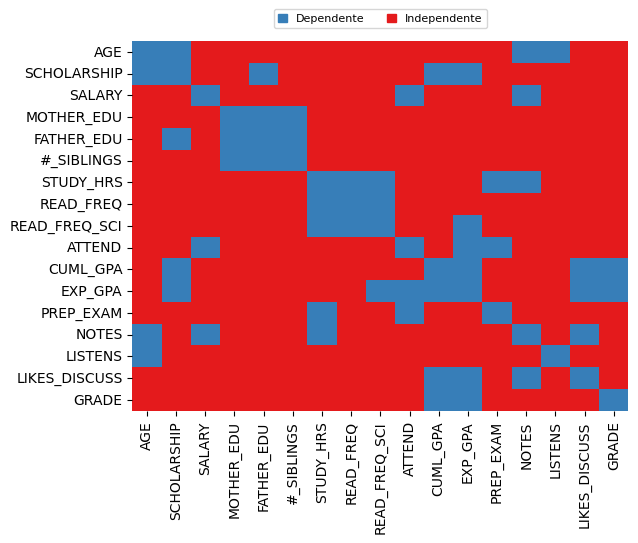

In [23]:
#Plotar os valores do teste de hipóteses em um heat map

nivel_significancia=2.5/100

#A hopótese nula é rejeitada se o p value for menor que o nivel de significância adotado
heat_map_significance(kendall_p_value,nivel_significancia)